# EDA

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from pandas.api.types import CategoricalDtype

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, precision_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [2]:
# test dataset
df_train = pd.read_csv("../data/train.csv")
df_train = df_train.drop('Id', axis = 1) # Drop ID from dataset

# print data info
print("dataset shape:", df_train.shape)
print("\nInfo:")
print(df_train.info())

print("\nDescribe:")
print(df_train.describe())



dataset shape: (1460, 80)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460

# Exploratory Data Analysis

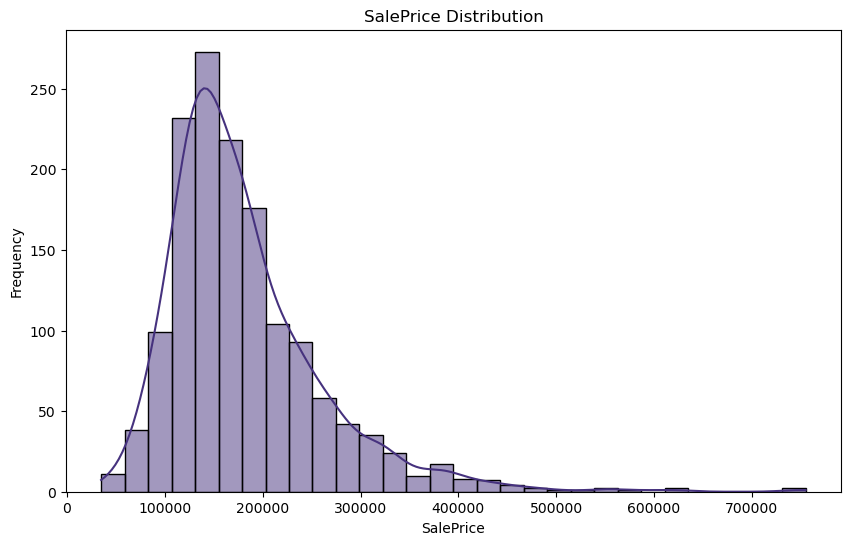

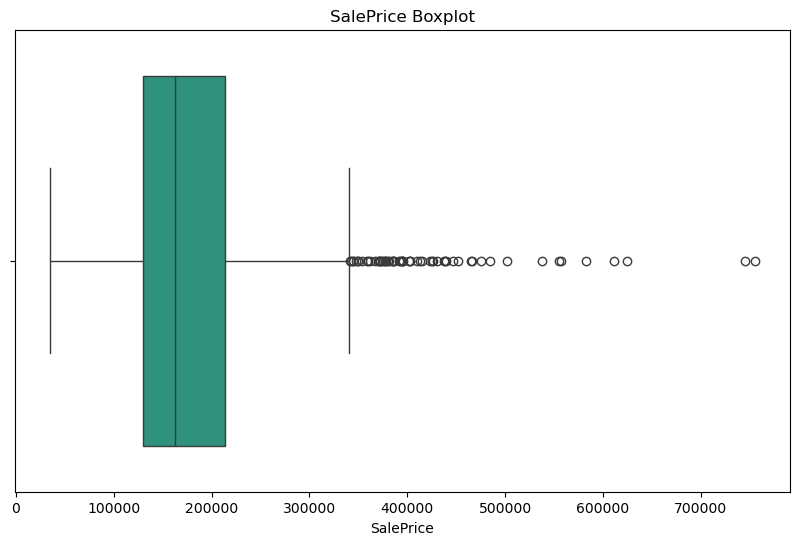

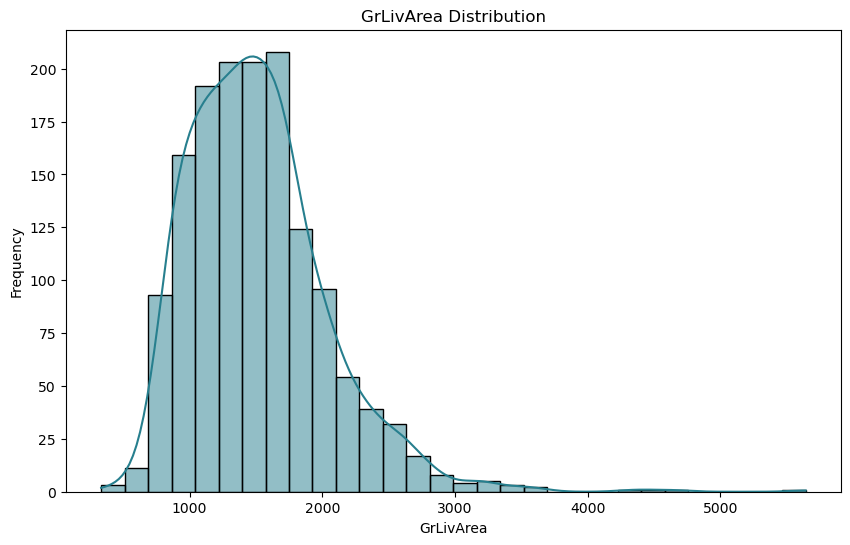

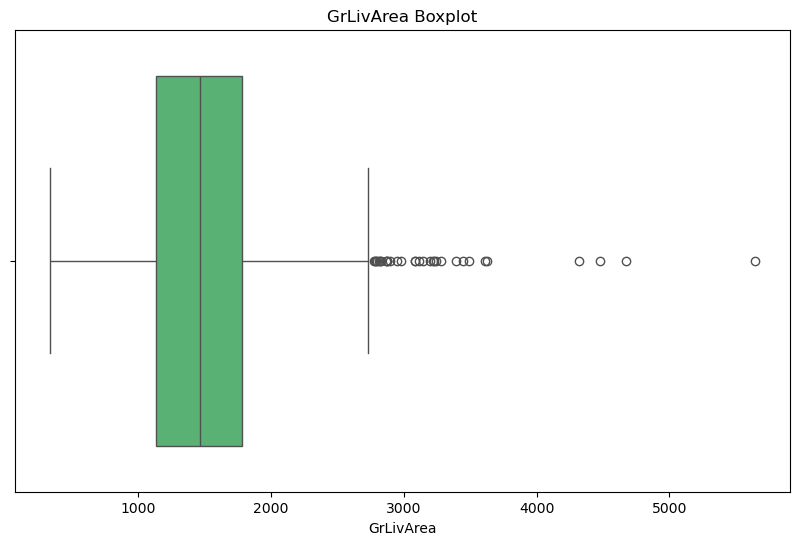

In [3]:
sns.set_palette("viridis")

# Histogram 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, bins=30, color=sns.color_palette("viridis")[0])
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Boxplot 'SalePrice'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['SalePrice'], color=sns.color_palette("viridis")[3])
plt.title('SalePrice Boxplot')
plt.xlabel('SalePrice')
plt.show()

# Histogram 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['GrLivArea'], kde=True, bins=30, color=sns.color_palette("viridis")[2])
plt.title('GrLivArea Distribution')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Boxplot 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['GrLivArea'], color=sns.color_palette("viridis")[4])
plt.title('GrLivArea Boxplot')
plt.xlabel('GrLivArea')
plt.show()


In [4]:
# Missing values
missing = df_train.isnull().sum()
missing_percent = (missing / df_train.shape[0]) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print("Missing values per column:")
print(missing_df.sort_values(by='Missing %', ascending=False))

# Correlation matrix
df_numeric = df_train.select_dtypes(include = ['float64', 'int64'])
corr_matrix = df_numeric.corr()

saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nSalePrice correlations:")
print(saleprice_corr)

# outliers
def outlier_analysis(series, variable_name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    total = series.shape[0]
    percent_outliers = 100 * outliers.shape[0] / total
    print(f"\nOutliers for {variable_name}:")
    print(f"  Total observations: {total}")
    print(f"  Number of outliers: {outliers.shape[0]}")
    print(f"  Outliers %: {percent_outliers:.2f}%")
    print(f"  Min value outliers: {outliers.min()}")
    print(f"  Max value outliers: {outliers.max()}")

# SalePrice outliers 
outlier_analysis(df_train['SalePrice'], 'SalePrice')

Missing values per column:
             Missing Count  Missing %
PoolQC                1453  99.520548
MiscFeature           1406  96.301370
Alley                 1369  93.767123
Fence                 1179  80.753425
MasVnrType             872  59.726027
...                    ...        ...
Heating                  0   0.000000
HeatingQC                0   0.000000
MSZoning                 0   0.000000
1stFlrSF                 0   0.000000
SalePrice                0   0.000000

[80 rows x 2 columns]

SalePrice correlations:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
O

### Numerical Feature Analysis

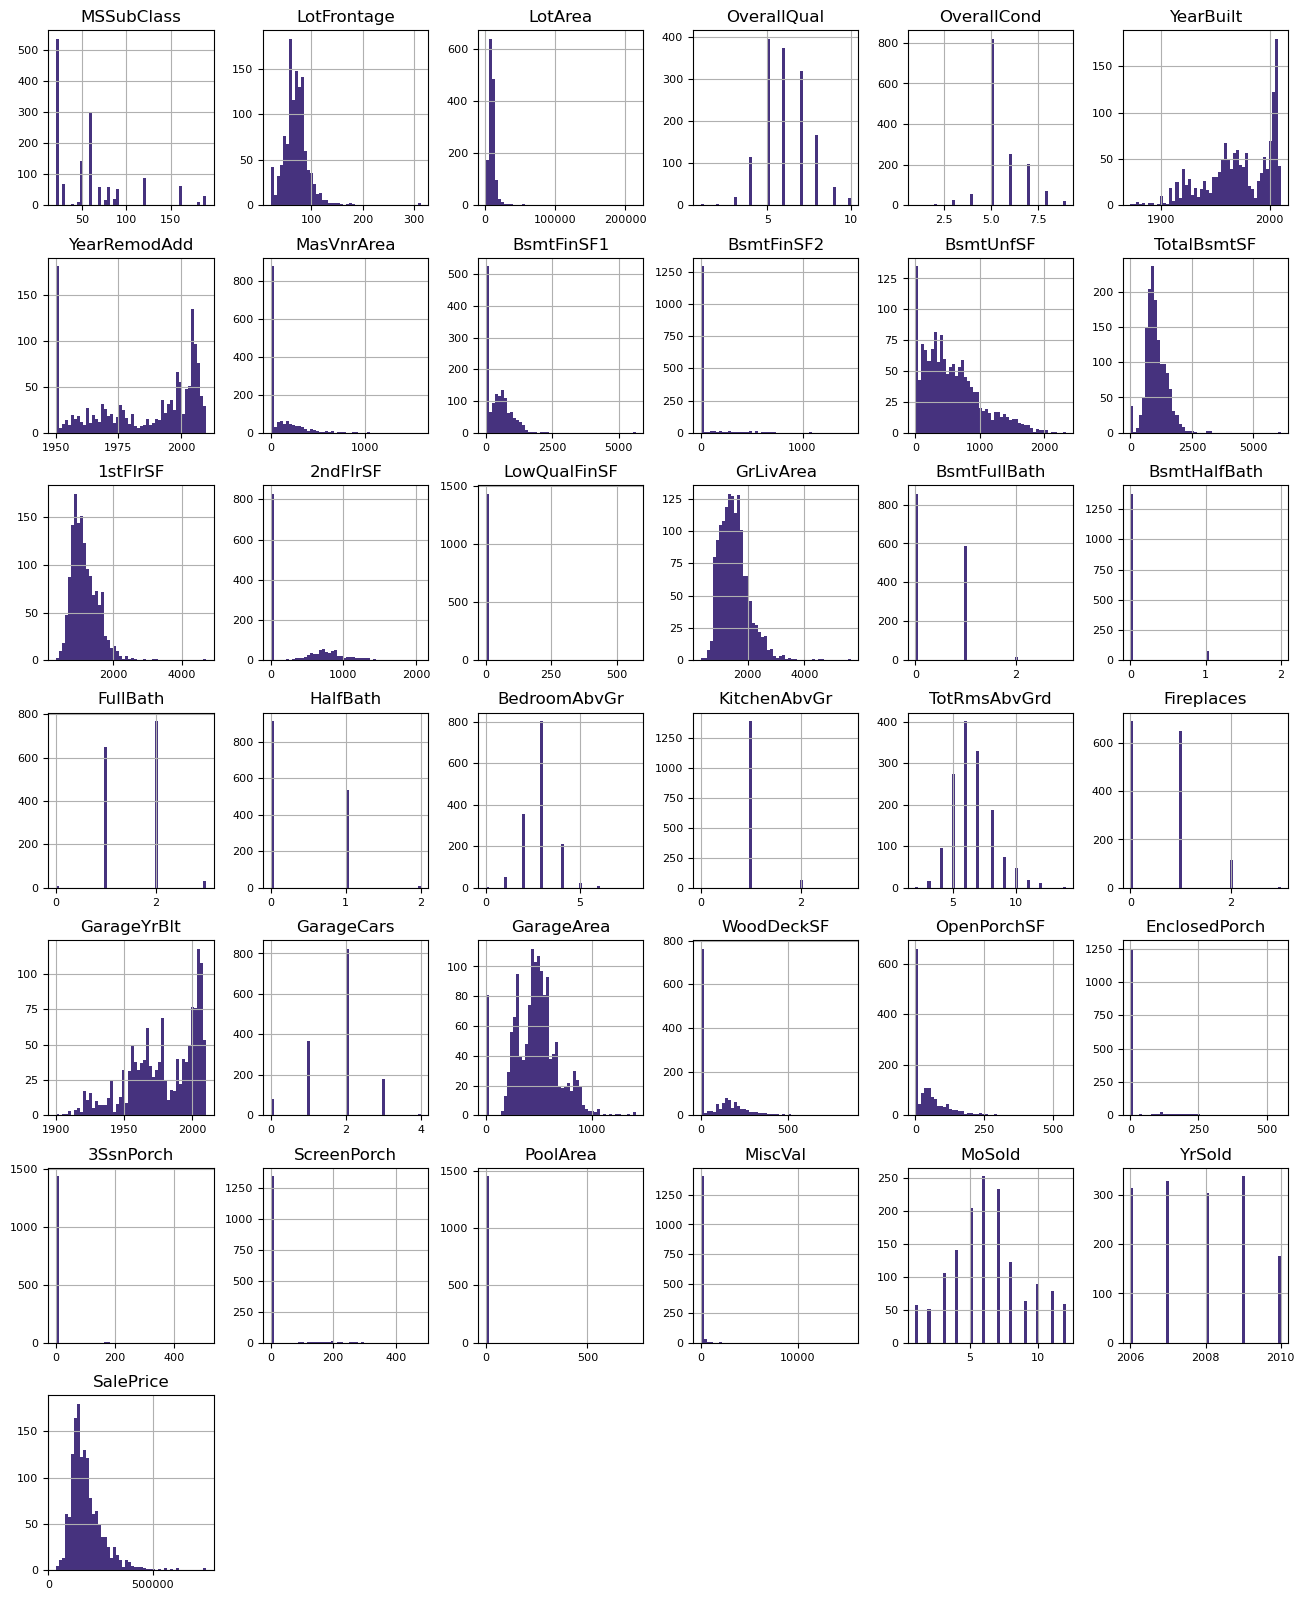

In [5]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Categorical Feature Analysis

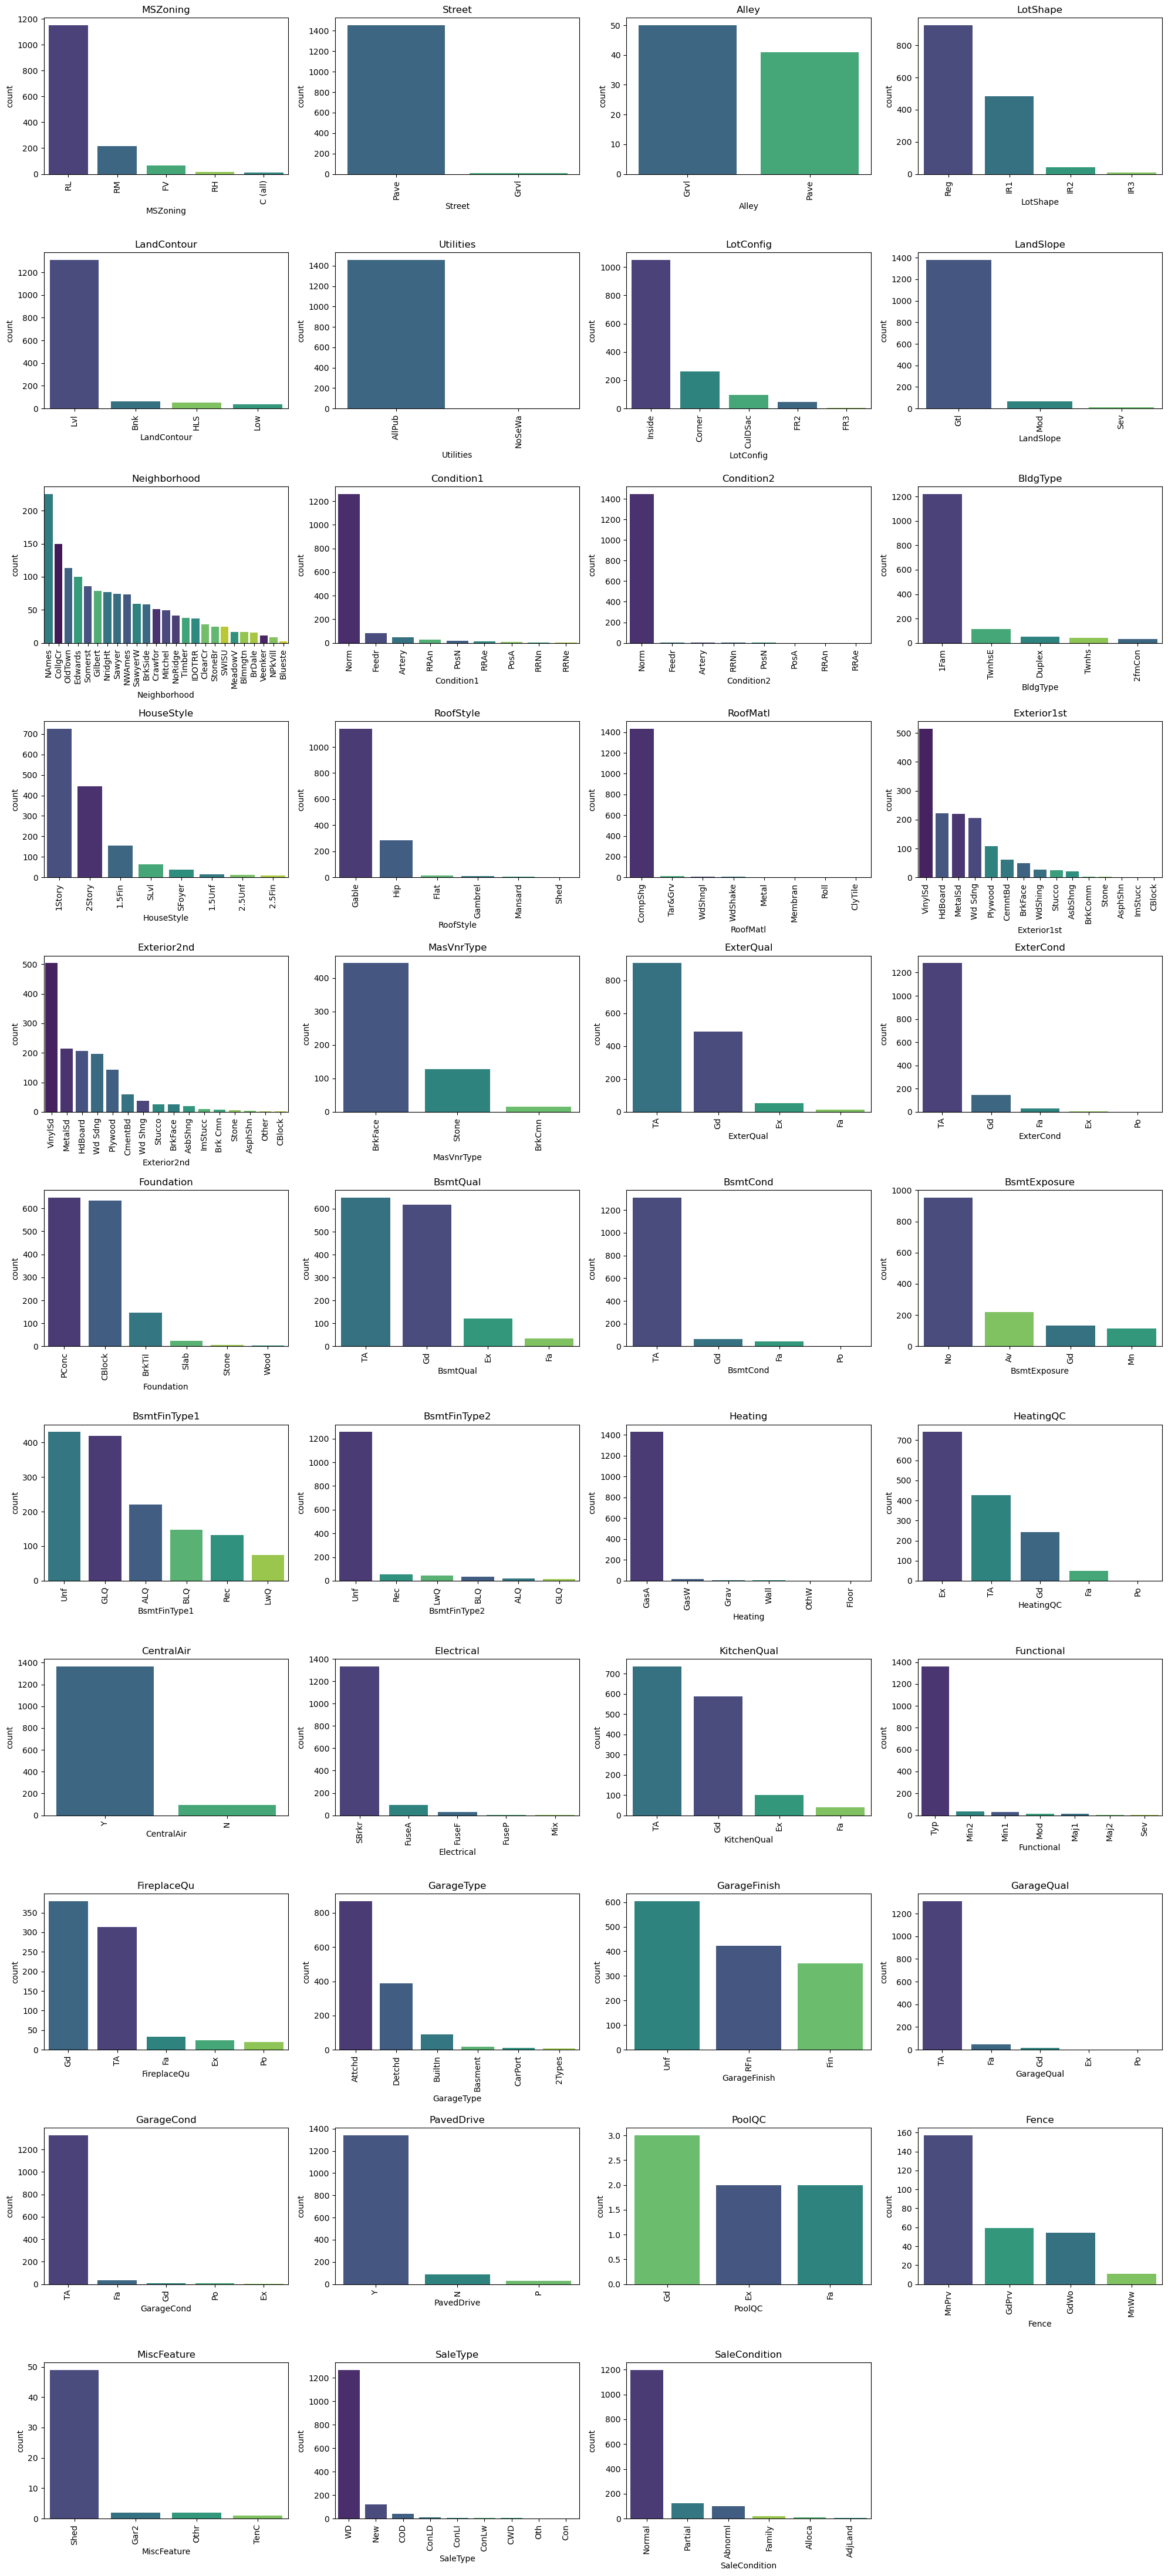

In [6]:
# Select categorical features
categorical_features = df_train.select_dtypes(include=['object']).columns

# Determine grid size
num_features = len(categorical_features)
num_cols = 4  # Adjust this for better layout
num_rows = math.ceil(num_features / num_cols)

# Create subplots
plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, hue=df_train[col], 
                  palette="viridis", legend=False)  # Set `hue=x` and disable legend
    plt.xticks(rotation=90)
    plt.title(col)

plt.tight_layout()
plt.show()

## Correlation with SalePrice

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
# Correlation matrix
df_numeric = df_train.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nSalePrice correlations:")
print(saleprice_corr)


SalePrice correlations:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePri

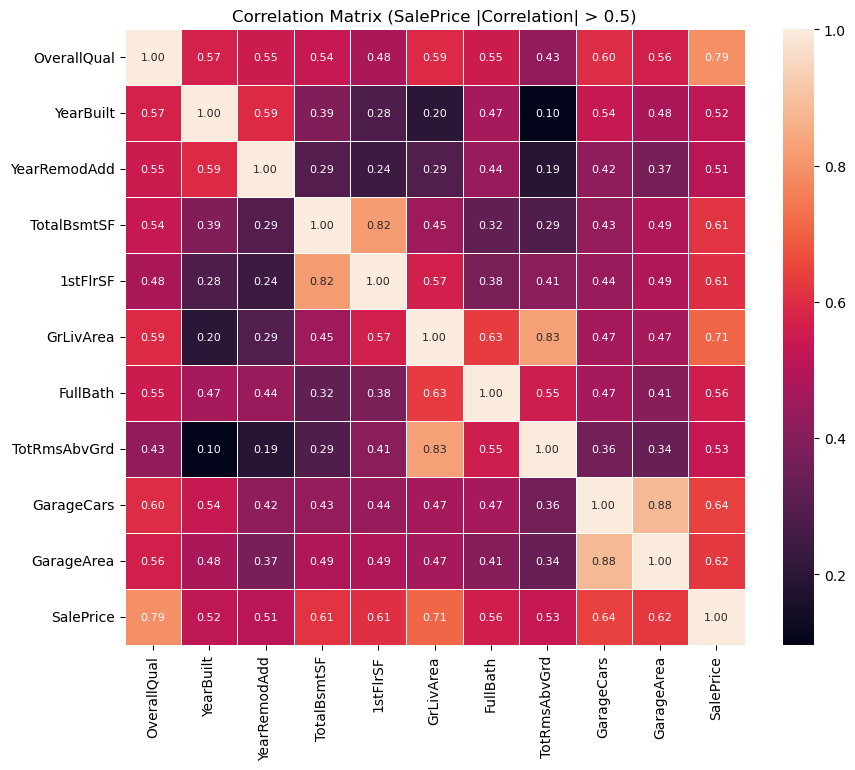

In [9]:
df_numeric = df_train.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

corr_threshold = 0.5
strong_corr_vars = corr_matrix["SalePrice"][abs(corr_matrix["SalePrice"]) > corr_threshold].index

filtered_corr_matrix = corr_matrix.loc[strong_corr_vars, strong_corr_vars]

plt.figure(figsize=(10, 8))

sns.heatmap(
    filtered_corr_matrix, 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    annot_kws={"size": 8}  
)

plt.title("Correlation Matrix (SalePrice |Correlation| > 0.5)")
plt.show()


## Check Multicollinearity with VIF

In [10]:
# numeric values
df_numeric = df_train.select_dtypes(include=[np.number]).drop(columns=["SalePrice"], errors="ignore")

# Missing values

## delete columns with more than 90% missing values
threshold = 0.9  
missing_percent = df_numeric.isnull().mean()
df_cleaned = df_numeric.loc[:, missing_percent < threshold]

# replace na with median values
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# VIF
vif_data_cleaned = pd.DataFrame()
vif_data_cleaned["Variable"] = df_cleaned.columns
vif_data_cleaned["VIF"] = [variance_inflation_factor(df_cleaned.values, i) for i in range(len(df_cleaned.columns))]

# results
print("VIF:")
print(vif_data_cleaned)

VIF:
         Variable           VIF
0      MSSubClass  4.648665e+00
1     LotFrontage  1.733722e+01
2         LotArea  2.646056e+00
3     OverallQual  6.659442e+01
4     OverallCond  4.167002e+01
5       YearBuilt  2.128391e+04
6    YearRemodAdd  2.241501e+04
7      MasVnrArea  1.841908e+00
8      BsmtFinSF1           inf
9      BsmtFinSF2           inf
10      BsmtUnfSF           inf
11    TotalBsmtSF           inf
12       1stFlrSF           inf
13       2ndFlrSF           inf
14   LowQualFinSF           inf
15      GrLivArea           inf
16   BsmtFullBath  3.694839e+00
17   BsmtHalfBath  1.219137e+00
18       FullBath  2.667944e+01
19       HalfBath  3.419317e+00
20   BedroomAbvGr  3.108438e+01
21   KitchenAbvGr  3.752022e+01
22   TotRmsAbvGrd  8.344719e+01
23     Fireplaces  3.018918e+00
24    GarageYrBlt  2.251703e+04
25     GarageCars  3.680061e+01
26     GarageArea  3.218701e+01
27     WoodDeckSF  1.905146e+00
28    OpenPorchSF  1.825919e+00
29  EnclosedPorch  1.447168e+00
30 

c:\Users\vidal\miniconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [11]:
vif_data_cleaned["VIF"] = round(vif_data_cleaned["VIF"])
vif_data_cleaned[vif_data_cleaned["VIF"] <= 5]

Variable  VIF
0      MSSubClass  5.0
2         LotArea  3.0
7      MasVnrArea  2.0
16   BsmtFullBath  4.0
17   BsmtHalfBath  1.0
19       HalfBath  3.0
23     Fireplaces  3.0
27     WoodDeckSF  2.0
28    OpenPorchSF  2.0
29  EnclosedPorch  1.0
30      3SsnPorch  1.0
31    ScreenPorch  1.0
32       PoolArea  1.0
33        MiscVal  1.0

## Correlation Matrix

Only including variables with high correlation

In [12]:
# correlation matrix
correlation_matrix = df_cleaned.corr().abs()

# variables with high correlation
high_correlation_vars = (correlation_matrix > 0.5).sum() > 1
selected_vars = correlation_matrix.loc[high_correlation_vars, high_correlation_vars]
num_selected_vars = selected_vars.shape[0]

selected_var_names = selected_vars.columns.tolist()
num_selected_vars, selected_var_names


(16,
 ['OverallQual',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'GrLivArea',
  'BsmtFullBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'TotRmsAbvGrd',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea'])

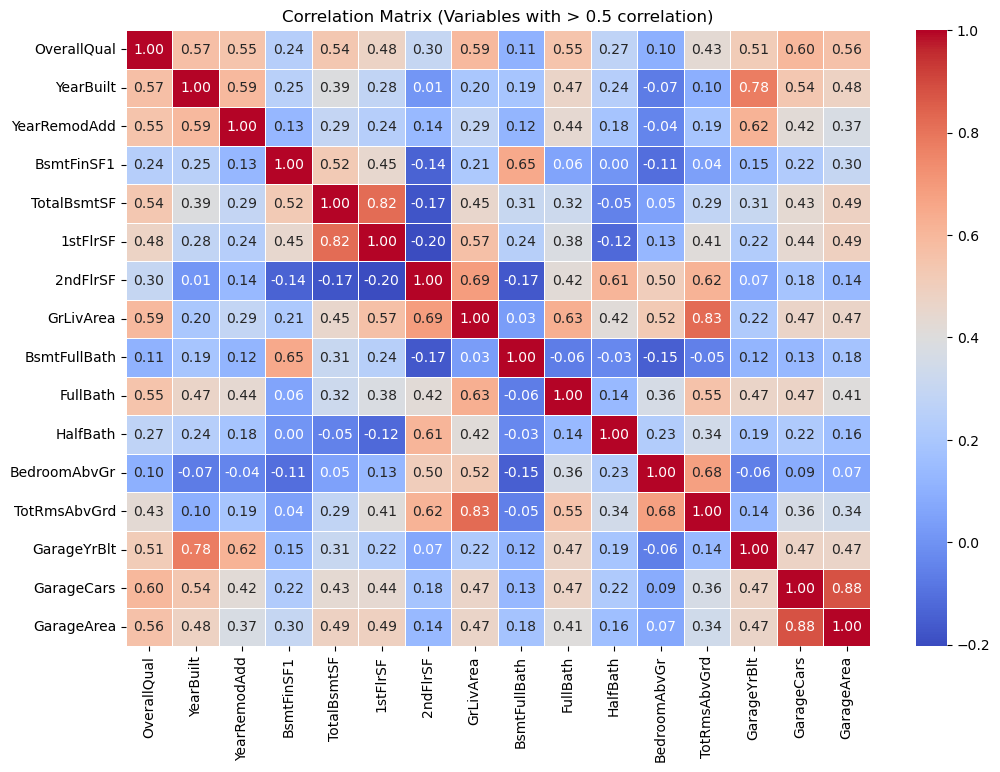

In [13]:
# new data fram
df_corr_selected = df_cleaned[selected_var_names]

# correlation matrix
corr_matrix_selected = df_corr_selected.corr()

# plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Variables with > 0.5 correlation)")
plt.show()


### Delete variables with high correlation

In [14]:
#df_reduced = df_corr_selected.copy()
df_reduced = df_train.select_dtypes(include=[np.number]).drop(columns=["SalePrice"], errors="ignore")

threshold = 0.8

# new correlation matrix
corr_matrix_upper = corr_matrix_selected.where(np.triu(np.ones(corr_matrix_selected.shape), k=1).astype(bool))

# high correlation variables
to_drop = [column for column in corr_matrix_upper.columns if any(corr_matrix_upper[column] > threshold)]

# delete variables
df_reduced.drop(columns=to_drop, inplace=True)

# Mostrar las variables eliminadas y las variables restantes
print(f"Variables deleted because high correlation (> {threshold}): {to_drop}")
print(f"Variables selected after elimination: {df_reduced.columns.tolist()}")


Variables deleted because high correlation (> 0.8): ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
Variables selected after elimination: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [15]:
from scipy.stats import zscore

# Calculate z-scores for numerical features
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64'])
z_scores = numerical_features.apply(zscore)

# Find features with high z-scores (e.g., greater than 3 or less than -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Count the number of outliers in each feature
outliers_count = outliers.sum()

# Sort the features by the number of outliers in descending order
sorted_outliers_count = outliers_count.sort_values(ascending=False)

# Print the number of outliers per feature, sorted from highest to lowest
print("Number of Outliers per Feature (Sorted):")
print(sorted_outliers_count)

Number of Outliers per Feature (Sorted):
BsmtHalfBath     82
KitchenAbvGr     68
ScreenPorch      55
EnclosedPorch    51
BsmtFinSF2       50
MasVnrArea       32
MSSubClass       30
OverallCond      28
OpenPorchSF      27
3SsnPorch        23
WoodDeckSF       22
LowQualFinSF     20
BsmtFullBath     16
LotFrontage      16
GrLivArea        16
BedroomAbvGr     14
LotArea          13
TotRmsAbvGrd     12
HalfBath         12
1stFlrSF         12
BsmtUnfSF        11
TotalBsmtSF      10
MiscVal           8
PoolArea          7
GarageArea        7
BsmtFinSF1        6
YearBuilt         6
Fireplaces        5
2ndFlrSF          4
OverallQual       2
GarageYrBlt       2
MoSold            0
FullBath          0
GarageCars        0
YearRemodAdd      0
YrSold            0
dtype: int64


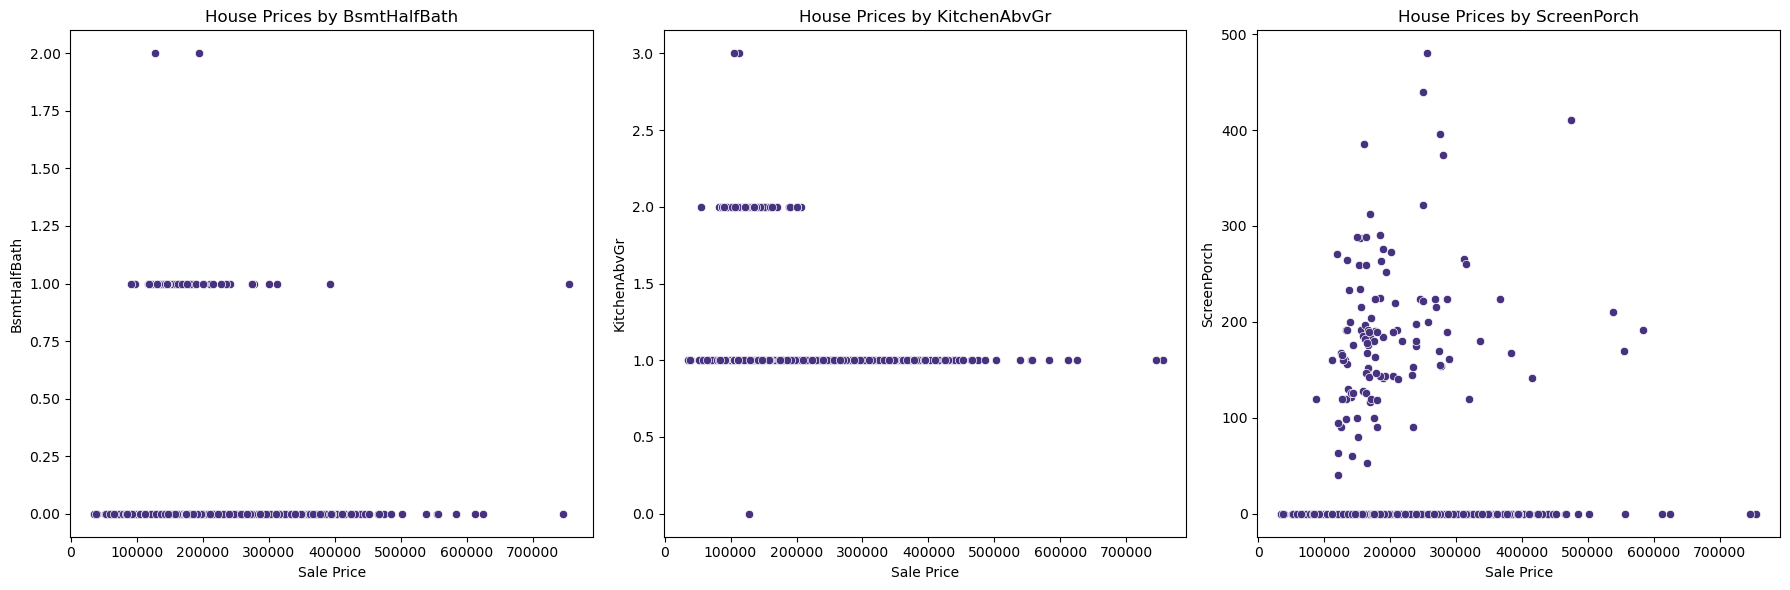

In [18]:
# Add SalePrice to the reduced dataset
df_plot = df_cleaned.copy()
df_plot["SalePrice"] = df_train["SalePrice"]

# variables to plot
key_variables = df_reduced.columns.tolist()

# Set figure size and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Define a Viridis color palette
palette = sns.color_palette("viridis")

# Plot 1: Neighborhood vs SalePrice
sns.scatterplot(ax=axes[0], y='BsmtHalfBath', x='SalePrice', data=df_plot, palette=palette)
axes[0].set_title('House Prices by BsmtHalfBath')
axes[0].set_ylabel('BsmtHalfBath')
axes[0].set_xlabel('Sale Price')

# Plot 2: MSZoning vs SalePrice
sns.scatterplot(ax=axes[1], y='KitchenAbvGr', x='SalePrice', data=df_plot, palette=palette)
axes[1].set_title('House Prices by KitchenAbvGr')
axes[1].set_ylabel('KitchenAbvGr')
axes[1].set_xlabel('Sale Price')

# Plot 3: SaleCondition vs SalePrice
sns.scatterplot(ax=axes[2], y='ScreenPorch', x='SalePrice', data=df_plot, palette=palette)
axes[2].set_title('House Prices by ScreenPorch')
axes[2].set_ylabel('ScreenPorch')
axes[2].set_xlabel('Sale Price')

# Adjust layout
plt.tight_layout()
plt.show()

### categorical variables

In [27]:
df_plot = pd.read_csv("train.csv", parse_dates = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'])
df_plot['YearBuilt'] = df_plot['YearBuilt'].dt.year
df_plot['YearRemodAdd'] = df_plot['YearRemodAdd'].dt.year
df_plot['GarageYrBlt'] = df_plot['GarageYrBlt'].dt.year
df_plot['YrSold'] = df_plot['YrSold'].dt.year
df_plot.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

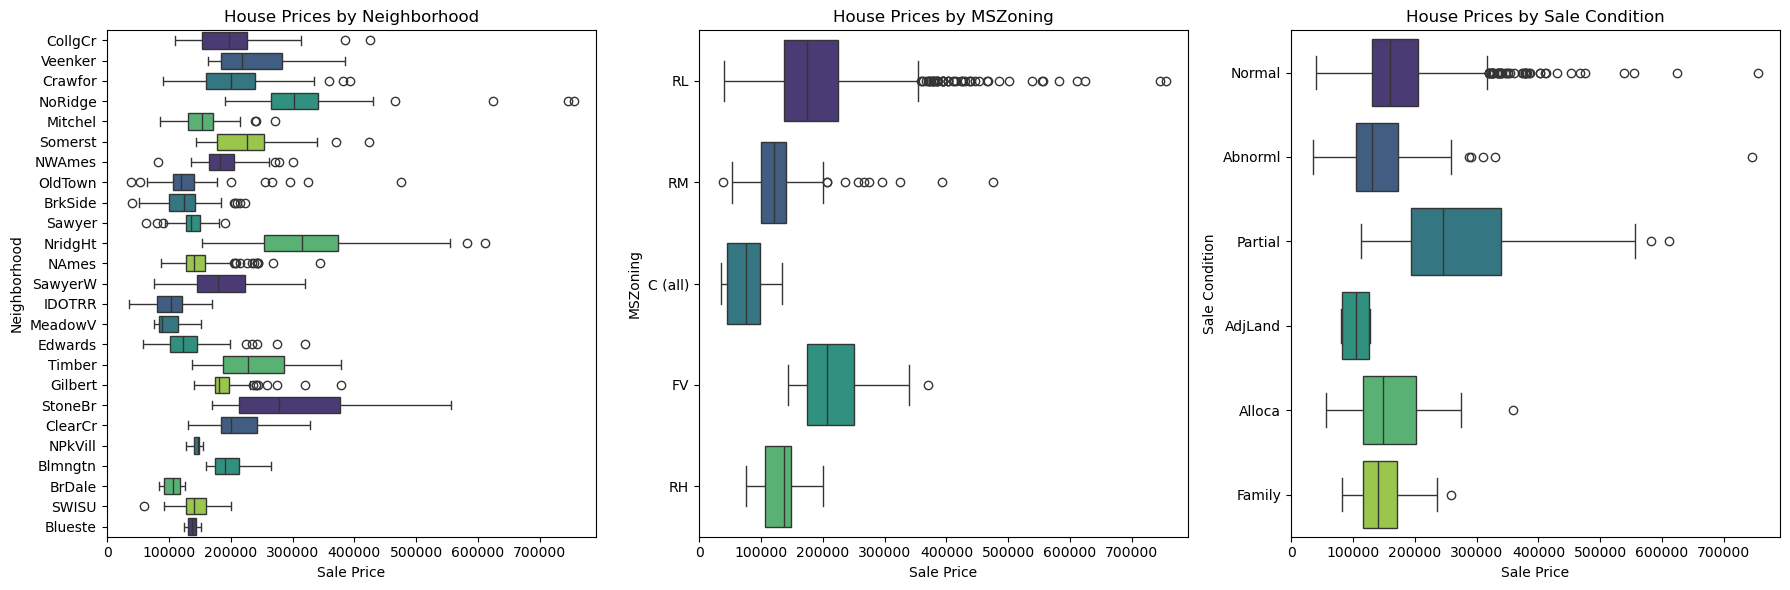

In [28]:
#df_plot['OverallCond'] = df_plot['OverallCond'].astype('category')

# Set figure size and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Define a Viridis color palette
palette = sns.color_palette("viridis")

# Plot 1: Neighborhood vs SalePrice
sns.boxplot(ax=axes[0], y='Neighborhood', x='SalePrice', data=df_plot, palette=palette)
axes[0].set_title('House Prices by Neighborhood')
axes[0].set_ylabel('Neighborhood')
axes[0].set_xlabel('Sale Price')

# Plot 2: MSZoning vs SalePrice
sns.boxplot(ax=axes[1], y='MSZoning', x='SalePrice', data=df_plot, palette=palette)
axes[1].set_title('House Prices by MSZoning')
axes[1].set_ylabel('MSZoning')
axes[1].set_xlabel('Sale Price')

# Plot 3: SaleCondition vs SalePrice
sns.boxplot(ax=axes[2], y='SaleCondition', x='SalePrice', data=df_plot, palette=palette)
axes[2].set_title('House Prices by Sale Condition')
axes[2].set_ylabel('Sale Condition')
axes[2].set_xlabel('Sale Price')

# Adjust layout
plt.tight_layout()
plt.show()

## Check linear (or not) relationships

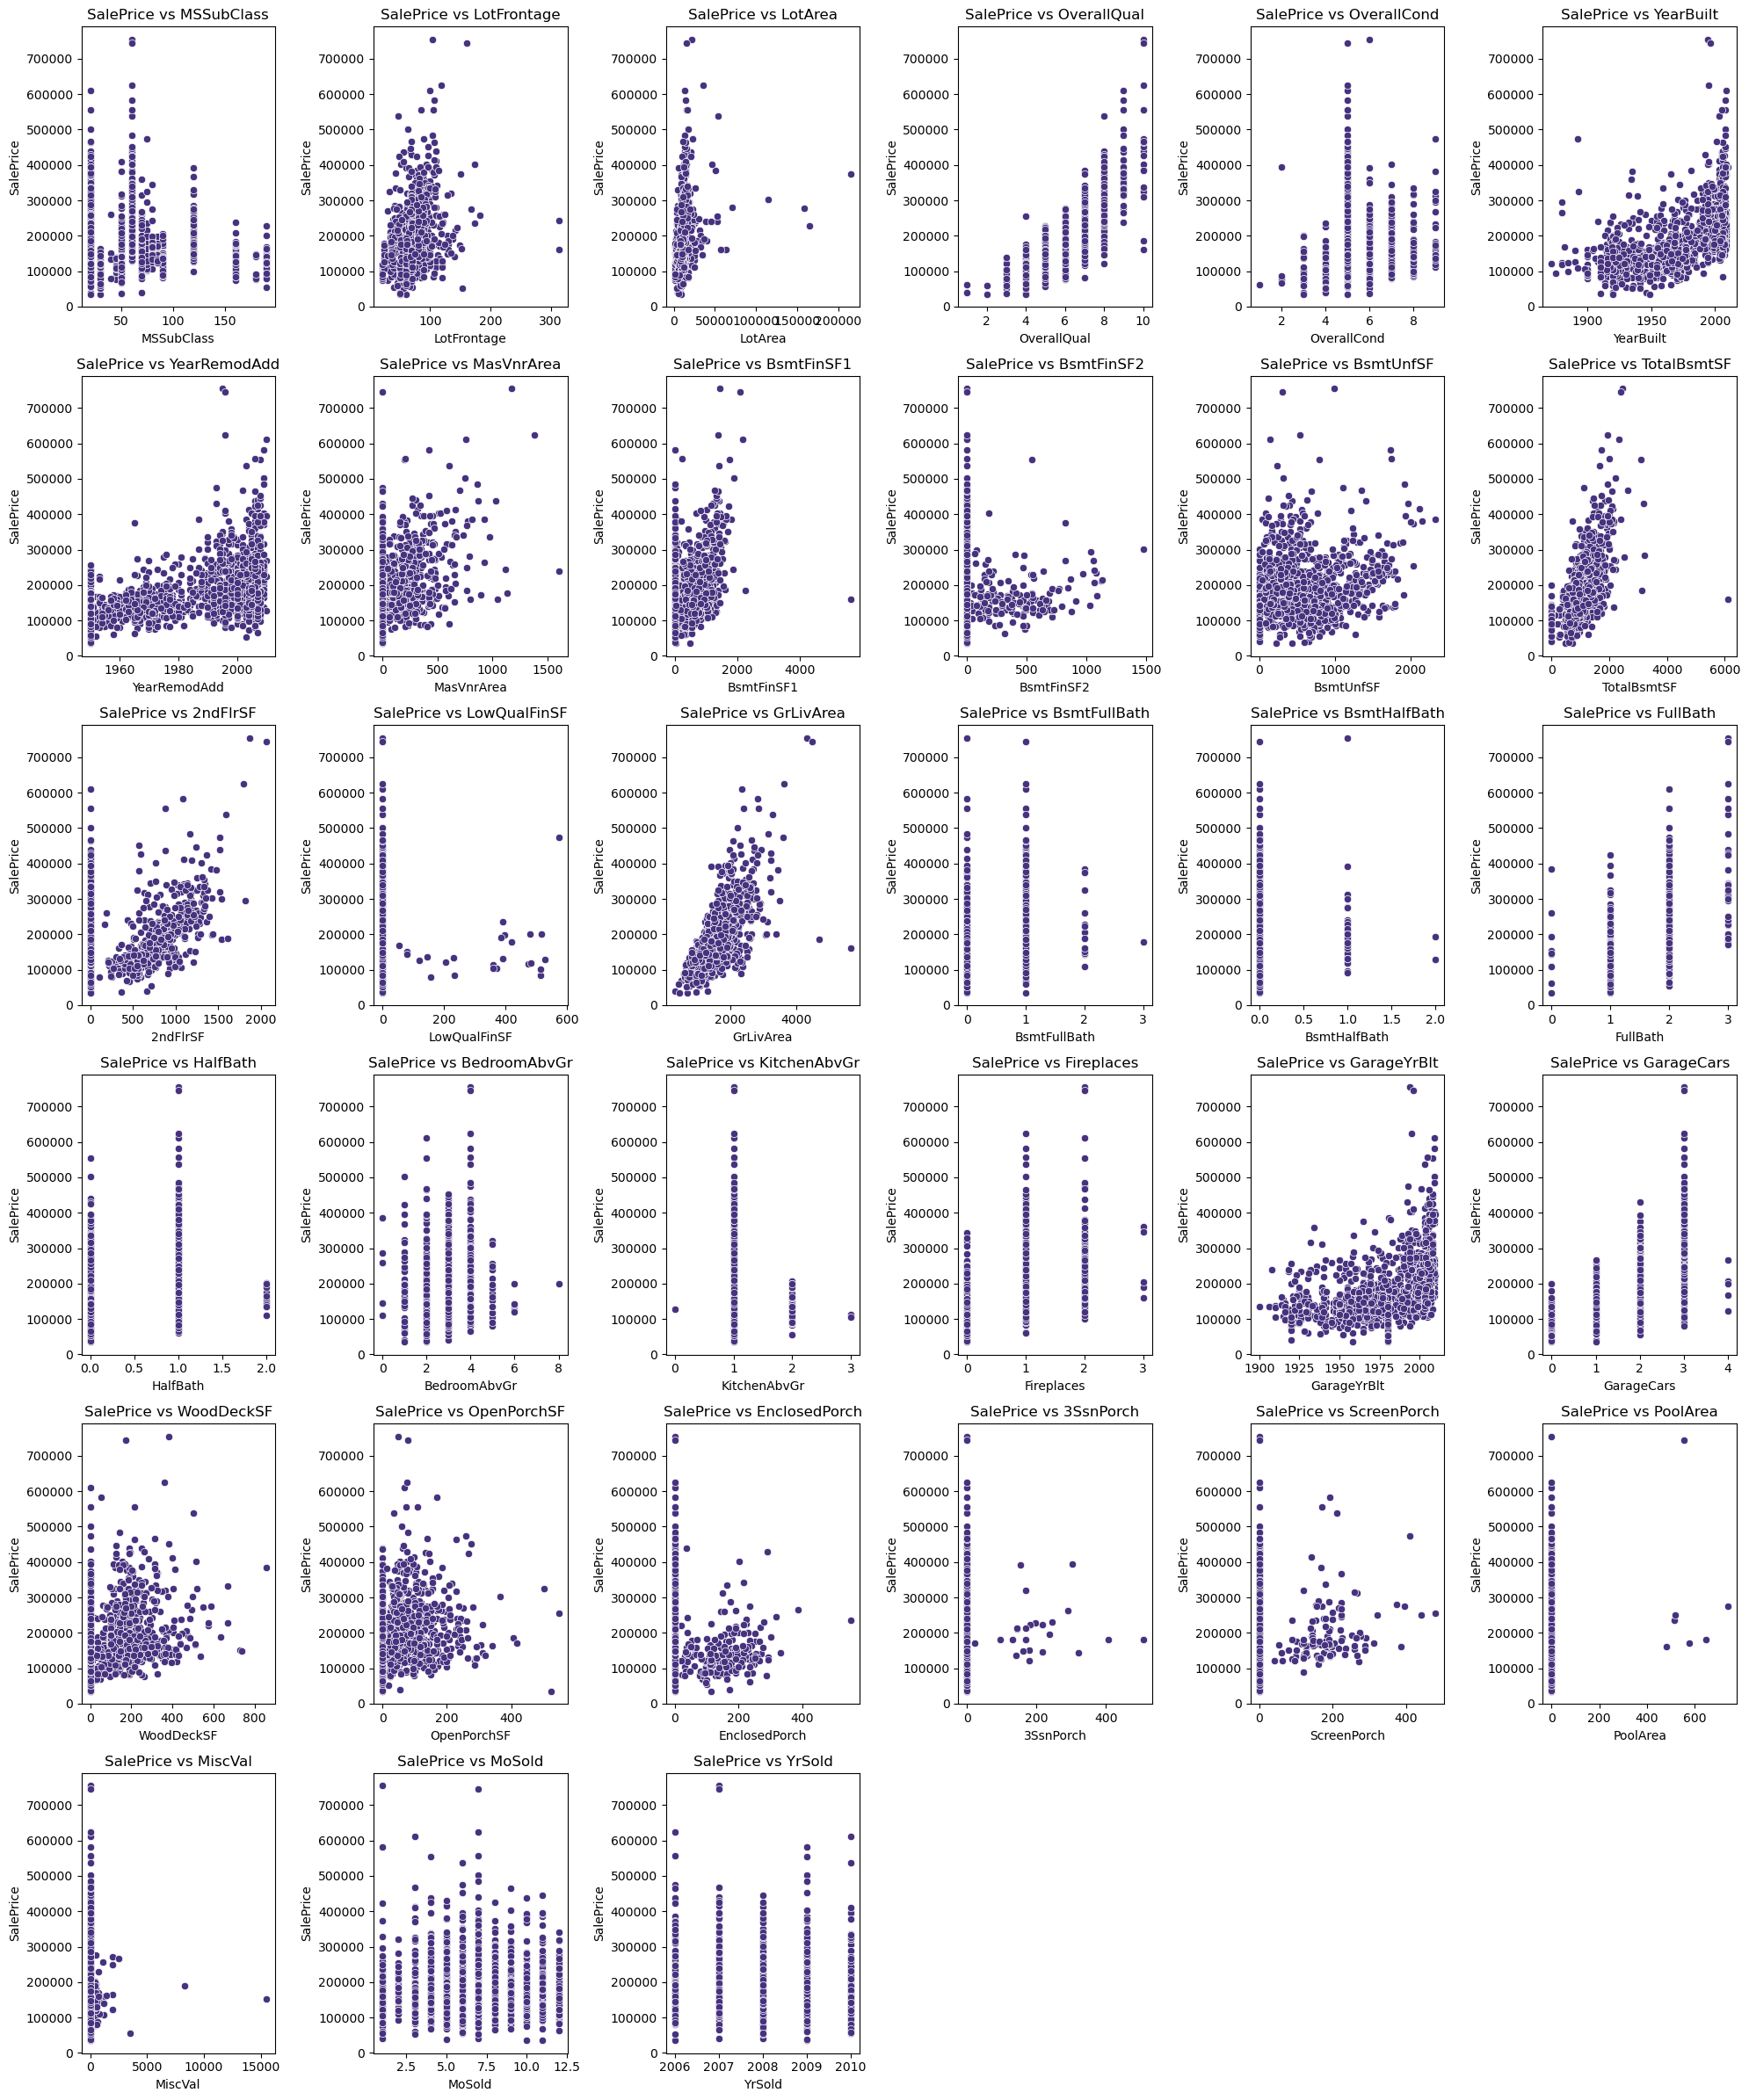

In [21]:
# Add SalePrice to the reduced dataset
df_plot = df_cleaned.copy()
df_plot["SalePrice"] = df_train["SalePrice"]

# variables to plot
key_variables = df_reduced.columns.tolist()

# size 6x6
cols = 6
rows = math.ceil(len(key_variables) / cols)  

# plot
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten() 

# scatter plots 
for i, var in enumerate(key_variables):
    sns.scatterplot(x=df_plot[var], y=df_plot["SalePrice"], ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("SalePrice")
    axes[i].set_title(f"SalePrice vs {var}")

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

c:\Users\vidal\miniconda3\Lib\site-packages\numpy\lib\polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

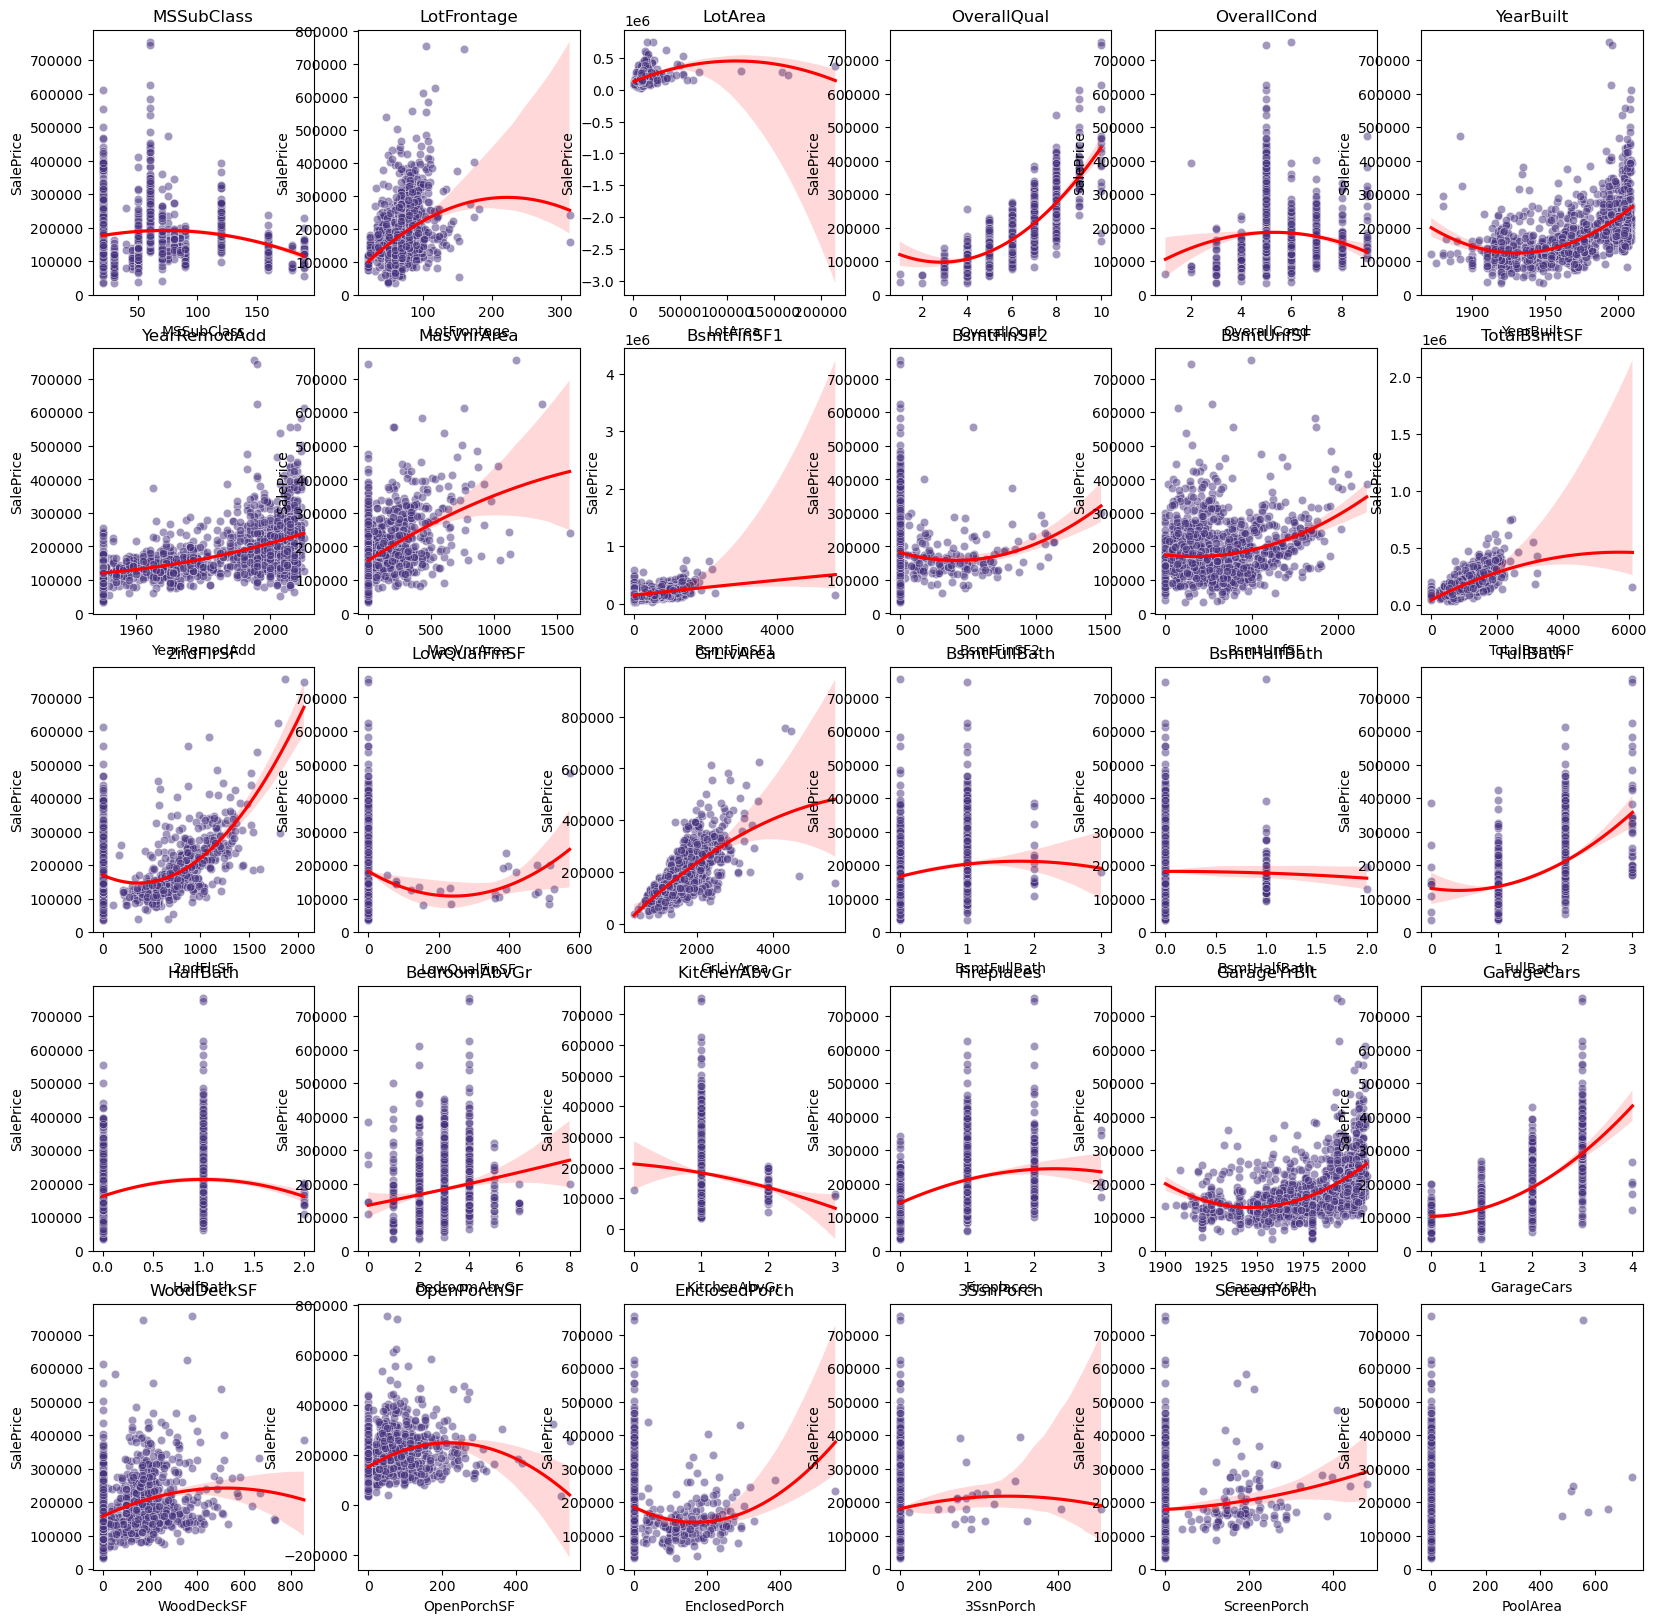

In [24]:
df_plot = df_cleaned.copy()
df_plot["SalePrice"] = df_train["SalePrice"]

# key variables
key_variables = df_reduced.columns.tolist()

# 6x6
cols = 6
rows = 5

# plot
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()

# polinomial 
for i, var in enumerate(key_variables):
    sns.scatterplot(x=df_plot[var], y=df_plot["SalePrice"], ax=axes[i], alpha=0.5)
    sns.regplot(x=df_plot[var], y=df_plot["SalePrice"], ax=axes[i], scatter=False, color='red', order=2)  
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("SalePrice")
    axes[i].set_title(var)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Linear Regression

In [25]:
# linear regression

# select variables
linear_vars = ["OverallQual", "TotalBsmtSF", "GrLivArea", "GarageCars", "GarageArea"]

# X and y
X = df_cleaned[linear_vars]
y = df_train["SalePrice"]  

# add constant
X = sm.add_constant(X)

# model
model = sm.OLS(y, X).fit()

# results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     926.5
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:46:25   Log-Likelihood:                -17499.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.907e+04   4638.450    -21.359      

## Transformations

In [26]:
# logarithmic transformation
log_vars = ["GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageArea", "2ndFlrSF"]
df_transformed = df_cleaned.copy()
df_transformed[log_vars] = np.log1p(df_transformed[log_vars])

# categorical variables
categorical_vars = ["FullBath", "HalfBath", "BedroomAbvGr", "BsmtFullBath"]
df_transformed[categorical_vars] = df_transformed[categorical_vars].astype(str)  

print(df_transformed.head())


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0         706           0  ...    6.308098   
1          1976         0.0         978           0  ...    6.133398   
2          2002       162.0         486           0  ...    6.411818   
3          1970         0.0         216           0  ...    6.466145   
4          2000       350.0         655           0  ...    6.729824   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch PoolArea  \
0           0           61      

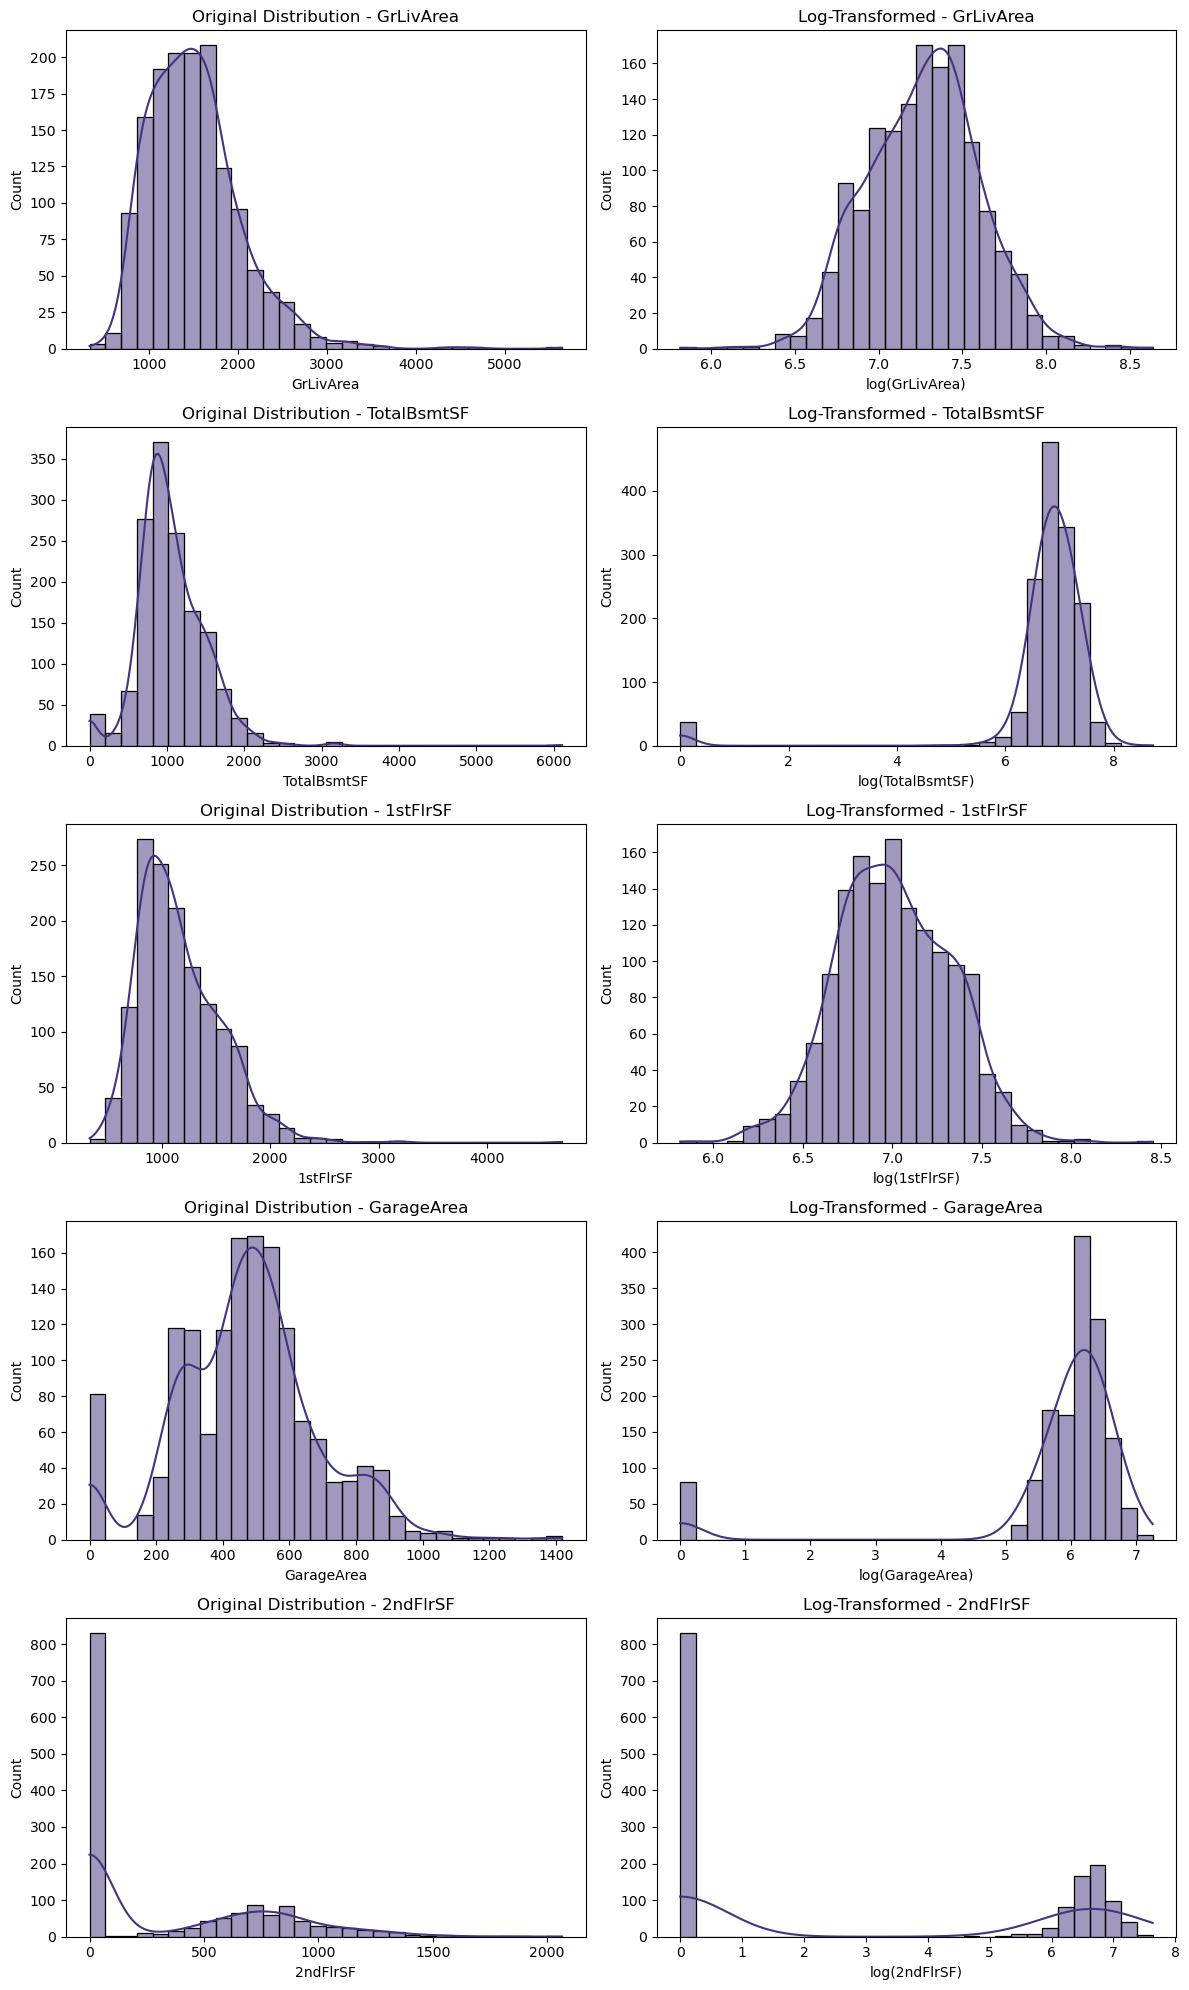

In [27]:
# trnasformed variables
log_vars = ["GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageArea", "2ndFlrSF"]

#plot
fig, axes = plt.subplots(len(log_vars), 2, figsize=(12, len(log_vars) * 4))

for i, var in enumerate(log_vars):
    # histogram before transformation
    sns.histplot(df_cleaned[var], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original Distribution - {var}")
    axes[i, 0].set_xlabel(var)

    # histogram after transformation
    sns.histplot(df_transformed[var], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Log-Transformed - {var}")
    axes[i, 1].set_xlabel(f"log({var})")

plt.tight_layout()
plt.show()


## PCA

In [28]:
# numeric values
df_pca = df_transformed.select_dtypes(include=[np.number])

# standardize
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# PCA
pca = PCA(n_components=0.95)  #95 variance
principal_components = pca.fit_transform(df_pca_scaled)

# varaince explained by PC
explained_variance = pca.explained_variance_ratio_
print("Variance explained by each principal component:", explained_variance)


Variance explained by each principal component: [0.1785089  0.07628153 0.07045195 0.05187903 0.04469357 0.03806288
 0.03704052 0.03486707 0.03423122 0.03340357 0.03264609 0.03142785
 0.03062493 0.02867335 0.02821685 0.02766771 0.02681015 0.02520555
 0.02352604 0.02272756 0.02225643 0.02054089 0.01941563 0.0151677 ]


In [29]:
# loadings
loadings = pd.DataFrame(pca.components_, columns=df_pca.columns)

loadings.index = [f'PC{i+1}' for i in range(len(loadings))]

top_pcs = loadings.iloc[:5]

top_vars_pc1 = top_pcs.loc["PC1"].abs().nlargest(5).index

filtered_loadings = top_pcs[top_vars_pc1]

#tools.display_dataframe_to_user(name="Top 5 PCs and Top 5 Variables in PC1", dataframe=filtered_loadings)
print(filtered_loadings)

     OverallQual  GarageCars  GrLivArea  YearBuilt  1stFlrSF
PC1     0.345528    0.325843   0.316679   0.279872  0.279150
PC2    -0.024822   -0.071846   0.347648  -0.370916  0.062873
PC3     0.097411    0.026601   0.121862   0.126042 -0.285726
PC4    -0.001560    0.002028  -0.023024  -0.050304  0.198331
PC5    -0.154979    0.033622   0.010817   0.096420  0.208370


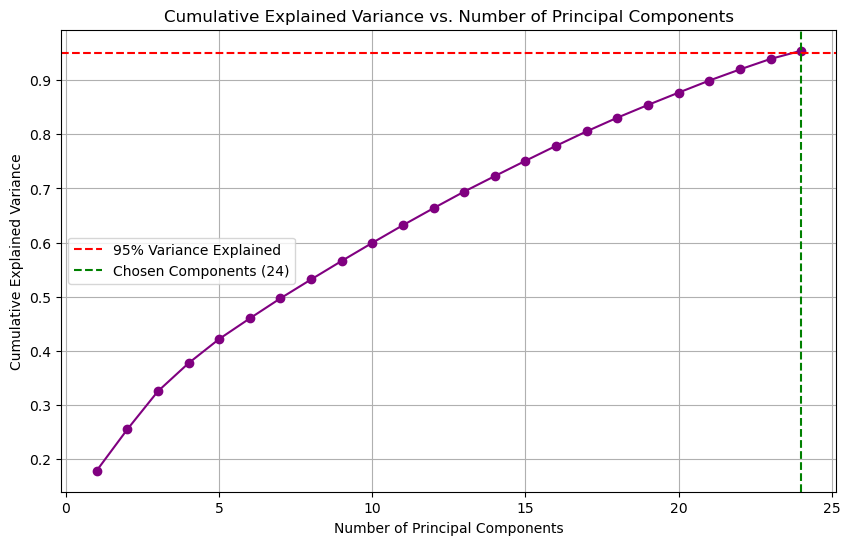

In [30]:
# cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='purple')

plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--', label=f'Chosen Components ({np.argmax(cumulative_variance >= 0.95) + 1})')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.legend()
plt.grid()

plt.show()


## Second Regression

In [31]:
# new regression variables
linear_vars_refined = ["OverallQual", "TotalBsmtSF", "GrLivArea", "GarageCars"]

# X and y
X_refined = df_transformed[linear_vars_refined]
y = df_train["SalePrice"] 

# add constant
X_refined = sm.add_constant(X_refined)

# model
model_refined = sm.OLS(y, X_refined).fit()

print(model_refined.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     953.3
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:48:59   Log-Likelihood:                -17605.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1455   BIC:                         3.525e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.62e+05   2.81e+04    -20.013      

## Check again for multicollinearity

In [32]:
# evaluate multicollinearity with VIF

# VIF
vif_data_refined = pd.DataFrame()
vif_data_refined["Variable"] = X_refined.columns
vif_data_refined["VIF"] = [variance_inflation_factor(X_refined.values, i) for i in range(len(X_refined.columns))]

print(vif_data_refined)


      Variable         VIF
0        const  658.749398
1  OverallQual    2.109442
2  TotalBsmtSF    1.134645
3    GrLivArea    1.673908
4   GarageCars    1.630814


## PCA for transformed variables

In [33]:
# numeric variables
df_pca_final = df_transformed.select_dtypes(include=[np.number])

# standarize
scaler = StandardScaler()
df_pca_scaled_final = scaler.fit_transform(df_pca_final)

# PCA 95% variance
pca_final = PCA(n_components=0.95)
principal_components_final = pca_final.fit_transform(df_pca_scaled_final)

explained_variance_final = pca_final.explained_variance_ratio_
print("Explained variance for each PC:", explained_variance_final)

df_pca_model = pd.DataFrame(principal_components_final, columns=[f"PC{i+1}" for i in range(principal_components_final.shape[1])])

# PCA Regression
X_pca = sm.add_constant(df_pca_model)
model_pca = sm.OLS(y, X_pca).fit()

# results
print(model_pca.summary())


Explained variance for each PC: [0.1785089  0.07628153 0.07045195 0.05187903 0.04469357 0.03806288
 0.03704052 0.03486707 0.03423122 0.03340357 0.03264609 0.03142785
 0.03062493 0.02867335 0.02821685 0.02766771 0.02681015 0.02520555
 0.02352604 0.02272756 0.02225643 0.02054089 0.01941563 0.0151677 ]
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     213.4
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:49:07   Log-Likelihood:                -17435.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1435   BIC:                         3.505e+04
Df Model:                          24                              

**Interpretation PCA Regression:** A linear regression model was applied to the principal components generated using Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and eliminate multicollinearity between predictors. The model retained 24 components that explain 95% of the variance in the original dataset and achieved a coefficient of determination (R^2 = 0.781), slightly outperforming traditional linear models. This improvement suggests that PCA is able to capture complex structural patterns through combinations of highly correlated variables.

Several principal components were found to be statistically significant, especially the first (PC1), which accounts for a high percentage of the variance and is strongly associated with key variables such as GrLivArea and OverallQual. Other components also showed significant relationships with SalePrice, although some were not significant on their own. Despite the improved performance, the model has a significant disadvantage: the loss of interpretability, as the components do not correspond directly to the original variables.

In the context of this project, this model addresses RQ2 and RQ4 by showing that dimensionality reduction techniques such as PCA can improve model fit and capture indirect relationships that a simple linear model fails to detect. However, due to the loss of interpretability, it is recommended to complement this approach with principal loadings analysis and more flexible models, such as decision trees or neural networks, to validate whether nonlinear relationships can be captured more effectively.

## Data Preprocessing pipeline for Predictive Modelling

In [36]:
# Load dataset
df_train = pd.read_csv("../data/train.csv")

df_train = df_train.drop('Id', axis = 1) # Drop ID column
df_train['log(SalePrice)'] = np.log1p(df_train["SalePrice"]) # Log transformation of target variable = 'SalePrice'
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1201 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   Alley           91 non-null     object 
 6   LotShape        1460 non-null   object 
 7   LandContour     1460 non-null   object 
 8   Utilities       1460 non-null   object 
 9   LotConfig       1460 non-null   object 
 10  LandSlope       1460 non-null   object 
 11  Neighborhood    1460 non-null   object 
 12  Condition1      1460 non-null   object 
 13  Condition2      1460 non-null   object 
 14  BldgType        1460 non-null   object 
 15  HouseStyle      1460 non-null   object 
 16  OverallQual     1460 non-null   int64  
 17  OverallCond     1460 non-null   i

In [37]:
## delete columns with more than 90% missing values
threshold = 0.9  
missing_percent = df_train.isnull().mean()
df_final = df_train.loc[:, missing_percent < threshold]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1201 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   int64  
 16  OverallCond     1460 non-null   int64  
 17  YearBuilt       1460 non-null   i

In [38]:
# Handle multi-collinearity

# Define target variables
target_vars = ["SalePrice", "log(SalePrice)"]

# numeric values
df_numeric = df_final.select_dtypes(include=[np.number]).drop(columns=target_vars, errors="ignore")

# Compute absolute correlation matrix, excluding target variables
correlation_matrix = df_numeric.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate comparisons
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns that have a correlation higher than threshold
threshold = 0.8
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop highly correlated columns, ensuring target variables are kept
df_final = df_final.drop(columns=to_drop, errors="ignore")

# Print dropped columns
print(f"Dropped {len(to_drop)} highly correlated columns: {to_drop}")


Dropped 4 highly correlated columns: ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


In [39]:
# Separate features and target
X = df_final.drop(["SalePrice", "log(SalePrice)"], axis=1)
y = df_final["log(SalePrice)"]

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Categorical variables: Fill missing values
if categorical_features.any():
    imputer = SimpleImputer(strategy="most_frequent")
    df_final.loc[:, categorical_features] = imputer.fit_transform(df_final[categorical_features])

# Numerical variables: Median imputation
if numerical_features.any():
    imputer = SimpleImputer(strategy="median")
    df_final.loc[:, numerical_features] = imputer.fit_transform(df_final[numerical_features])

print(df_final.info())

# Label encoding for categorical variables
if categorical_features.any():
    label_encoder = LabelEncoder()
    for col in categorical_features:
        df_final.loc[:, col] = label_encoder.fit_transform(df_final[col])

# Standardizing numerical variables
if numerical_features.any():
    scaler = StandardScaler()
    df_final.loc[:, numerical_features] = scaler.fit_transform(df_final[numerical_features])

Categorical Features: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Features: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', '

In [40]:
df_final['YearBuilt'].head()

0    1.050994
1    0.156734
2    0.984752
3   -1.863632
4    0.951632
Name: YearBuilt, dtype: float64

In [41]:
df_final['YearBuilt']

0       1.050994
1       0.156734
2       0.984752
3      -1.863632
4       0.951632
          ...   
1455    0.918511
1456    0.222975
1457   -1.002492
1458   -0.704406
1459   -0.207594
Name: YearBuilt, Length: 1460, dtype: float64

### Factor Analysis

In [44]:
from sklearn.decomposition import FactorAnalysis
import numpy as np

n_factors = 10  # Choose based on variance explained
fa = FactorAnalysis(n_components=n_factors, random_state=42)

X = df_final.drop(["SalePrice","log(SalePrice)"], axis=1)
X_fa = fa.fit_transform(X)

# Compute the explained variance
# Explained variance can be approximated using the squared sum of loadings for each factor
explained_variance = np.sum(fa.components_**2, axis=1)

# Print the explained variance
print(f"Explained Variance by Factors:\n{explained_variance}")


Explained Variance by Factors:
[ 5.17547096  4.26323431  1.67824105  6.3693409  24.71042965 11.40038259
  5.68151623 16.342669    1.388285    1.11652146]


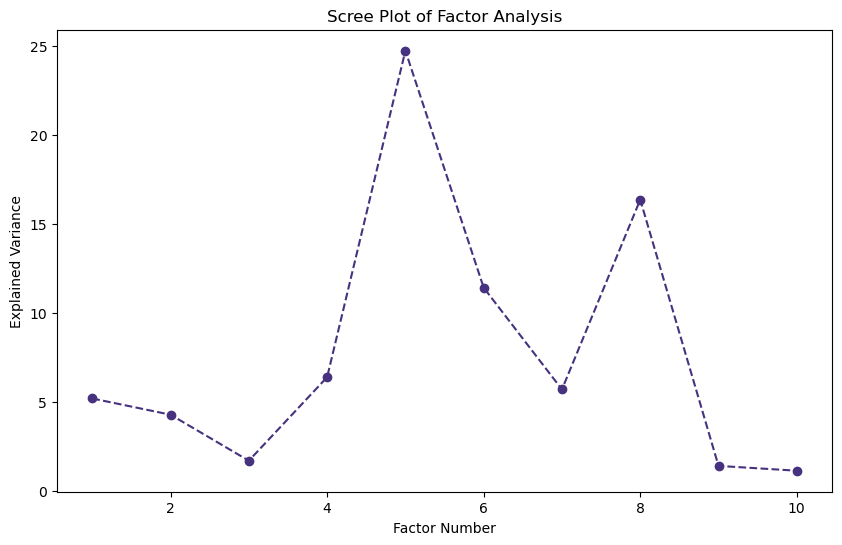

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_factors + 1), explained_variance, marker="o", linestyle="--")
plt.xlabel("Factor Number")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of Factor Analysis")
plt.show()


In [46]:
feature_names = X.columns  # Extract feature names from the dataset (X)

for i in range(10):
    # Extract the loadings for the 5th factor
    factor_loadings = fa.components_[i]
    
    # Create a DataFrame to display factor loadings against feature names
    factor_df = pd.DataFrame({
        'Feature': feature_names,
        'Factor Loading': factor_loadings
    })
    # Sort the factor loadings in descending order to identify the most significant features for this factor
    factor_df_sorted = factor_df.sort_values(by='Factor Loading', ascending=False)
    
    # Print the sorted factor loadings
    print(f"\n Factor {i+1} loadings\n{factor_df_sorted.head(10)}")


 Factor 1 loadings
         Feature  Factor Loading
32    BsmtFinSF1        0.983146
10  Neighborhood        0.761484
44  BsmtFullBath        0.663790
36   TotalBsmtSF        0.605177
52    Fireplaces        0.284772
24    MasVnrArea        0.270246
15   OverallQual        0.269392
17     YearBuilt        0.265648
56    GarageCars        0.247645
2    LotFrontage        0.243615

 Factor 2 loadings
         Feature  Factor Loading
35     BsmtUnfSF        0.888832
36   TotalBsmtSF        0.785015
10  Neighborhood        0.506732
15   OverallQual        0.482828
31  BsmtFinType1        0.399636
43     GrLivArea        0.393370
22   Exterior2nd        0.388073
21   Exterior1st        0.370296
56    GarageCars        0.366501
46      FullBath        0.361257

 Factor 3 loadings
         Feature  Factor Loading
34    BsmtFinSF2        0.986290
10  Neighborhood        0.224234
36   TotalBsmtSF        0.132338
38     HeatingQC        0.125702
3        LotArea        0.100294
64   ScreenPorch

In [47]:
# Assuming df_cleaned is your dataframe and you have already fitted the FactorAnalysis model (fa)
feature_names = X.columns  # Extract feature names from the dataset (X)

# Extract the loadings for the 5th factor
factor_5_loadings = fa.components_[4]

# Create a DataFrame to display factor loadings against feature names
factor_5_df = pd.DataFrame({
    'Feature': feature_names,
    'Factor 5 Loading': factor_5_loadings
})

# Sort the factor loadings in descending order to identify the most significant features for this factor
factor_5_df_sorted = factor_5_df.sort_values(by='Factor 5 Loading', ascending=False)

# Print the sorted factor loadings
print(factor_5_df_sorted.head(10))


          Feature  Factor 5 Loading
10   Neighborhood          4.787189
0      MSSubClass          0.391010
43      GrLivArea          0.343099
41       2ndFlrSF          0.338924
14     HouseStyle          0.325428
49   KitchenAbvGr          0.258966
54     GarageType          0.221173
13       BldgType          0.214623
48   BedroomAbvGr          0.207938
62  EnclosedPorch          0.170594


### Lasso Regression

LASSO Selected Features (Sorted by Importance):
GrLivArea: 0.1106
OverallQual: 0.1051
GarageCars: 0.0533
YearBuilt: 0.0512
OverallCond: 0.0426
CentralAir: 0.0343
Fireplaces: 0.0272
BsmtFullBath: 0.0252
TotalBsmtSF: 0.0228
SaleCondition: 0.0197
PavedDrive: 0.0188
KitchenQual: -0.0173
BsmtQual: -0.0169
ScreenPorch: 0.0164
YearRemodAdd: 0.0160
MSSubClass: -0.0158
LotArea: 0.0154
FullBath: 0.0152
Functional: 0.0120
WoodDeckSF: 0.0117
BsmtFinType1: -0.0104
PoolArea: -0.0095
HeatingQC: -0.0086
BsmtExposure: -0.0083
BldgType: -0.0083
MSZoning: -0.0079
ExterCond: 0.0071
Foundation: 0.0069
GarageFinish: -0.0068
BedroomAbvGr: 0.0065
LotShape: -0.0060
YrSold: -0.0059
RoofMatl: 0.0049
HalfBath: 0.0044
GarageType: -0.0044
EnclosedPorch: 0.0029
3SsnPorch: 0.0027
HouseStyle: -0.0026
FireplaceQu: -0.0022
RoofStyle: 0.0020
KitchenAbvGr: -0.0018
BsmtHalfBath: 0.0018
Exterior1st: -0.0017
LandContour: 0.0016
Exterior2nd: 0.0012
BsmtCond: 0.0012
Neighborhood: 0.0012
LotFrontage: -0.0011
SaleType: -0.0009
B

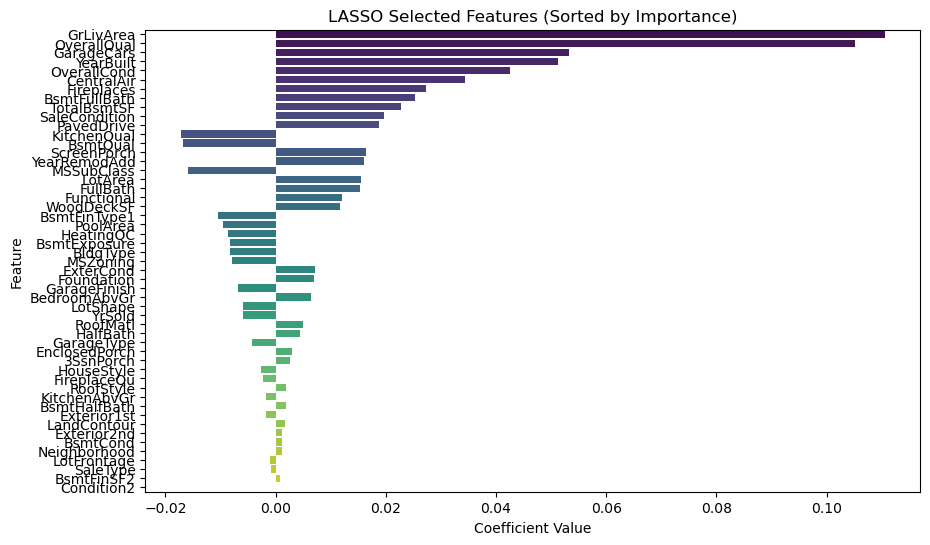

In [48]:
# Feature Selection Using LASSO (L1 Regularization)
# LASSO (Least Absolute Shrinkage and Selection Operator) sets some coefficients to zero, effectively selecting only the most important features.
X_scaled = X
# Apply LASSO with Cross-Validation
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_scaled, y)

# Select non-zero coefficients
non_zero_mask = lasso.coef_ != 0
selected_features = np.array(X.columns)[non_zero_mask]
coefficients = lasso.coef_[non_zero_mask]

# Sort features by absolute coefficient value (highest to lowest)
sorted_indices = np.argsort(np.abs(coefficients))[::-1]  # Sort descending
sorted_features = selected_features[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Print sorted features with coefficients
print("LASSO Selected Features (Sorted by Importance):")
for feature, coef in zip(sorted_features, sorted_coefficients):
    print(f"{feature}: {coef:.4f}")

# Convert to DataFrame for Seaborn compatibility
lasso_df = pd.DataFrame({"Feature": sorted_features, "Coefficient": sorted_coefficients})

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", hue="Feature", data=lasso_df, palette="viridis", legend=False)
plt.title("LASSO Selected Features (Sorted by Importance)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [49]:
# Select the top 10 features
top_n = 10
top_features = sorted_features[:top_n]
top_coefficients = sorted_coefficients[:top_n]

# Print the top 10 features with their coefficients
print("Top 10 LASSO Selected Features (Sorted):")
for feature, coef in zip(top_features, top_coefficients):
    print(f"{feature}: {coef:.4f}")

Top 10 LASSO Selected Features (Sorted):
GrLivArea: 0.1106
OverallQual: 0.1051
GarageCars: 0.0533
YearBuilt: 0.0512
OverallCond: 0.0426
CentralAir: 0.0343
Fireplaces: 0.0272
BsmtFullBath: 0.0252
TotalBsmtSF: 0.0228
SaleCondition: 0.0197


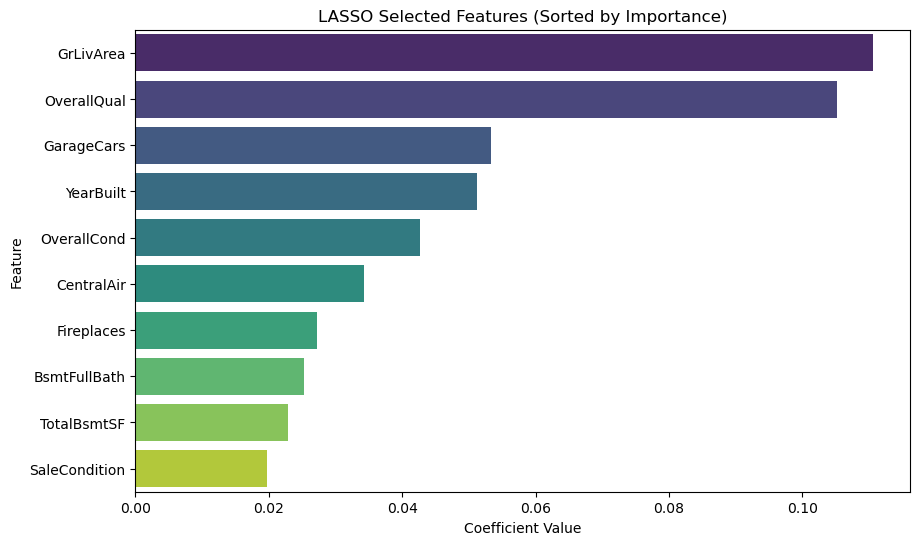

In [50]:
# Convert to DataFrame for Seaborn compatibility
lasso_df = pd.DataFrame({"Feature": sorted_features[:10], "Coefficient": sorted_coefficients[:10]})

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", hue="Feature", data=lasso_df, palette="viridis", legend=False)
plt.title("LASSO Selected Features (Sorted by Importance)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

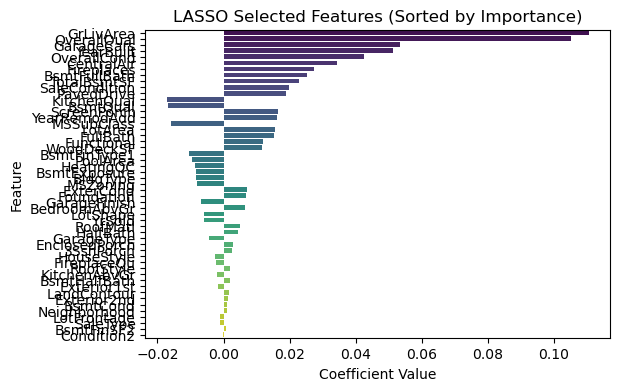

In [51]:
# Convert to DataFrame for Seaborn compatibility
lasso_df = pd.DataFrame({"Feature": sorted_features, "Coefficient": sorted_coefficients})

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x="Coefficient", y="Feature", hue="Feature", data=lasso_df, palette="viridis", legend=False)
plt.title("LASSO Selected Features (Sorted by Importance)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Research Question 1 

In [173]:
# Separate target variable
X = df_cleaned.drop(["SalePrice", "log(SalePrice)"], axis=1)
y = df_cleaned["SalePrice"]

# Define models and hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters for Linear Regression
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [5, 10, 15, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    }
}

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and evaluate using GridSearchCV
results = []
for name, config in models.items():
    print(f"Training {name}...")
    print(f"..............................................................")

    if config["params"]:  # If there are hyperparameters to tune
        grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_rmse = -grid_search.best_score_  # Convert negative RMSE to positive

        print(f"Best parameters for {name}: {best_params}")
        
    else:  # For Linear Regression (no hyperparameters)
        best_model = config["model"].fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        best_rmse = mean_squared_error(y_test, y_pred, squared=False)
        best_params = "N/A"

    # Evaluate on test set
    y_pred_test = best_model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    results.append({
        "Model": name,
        "Best Params": best_params,
        "CV RMSE": best_rmse,
        "Test RMSE": test_rmse
    })

    print(f"Test RMSE for {name}: {test_rmse}")
    print(f"CV RMSE for {name}: {best_rmse}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test RMSE")
print(results_df)

Training Linear Regression...
..............................................................
Test RMSE for Linear Regression: 35998.700403349896
CV RMSE for Linear Regression: 35998.700403349896

Training Decision Tree...
..............................................................
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Test RMSE for Decision Tree: 38343.34705777359
CV RMSE for Decision Tree: 44413.186387220696

Training Random Forest...
..............................................................
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE for Random Forest: 30267.914941643663
CV RMSE for Random Forest: 32210.08238699847

Training Gradient Boosting...
..............................................................
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test RMSE for Gradient Boosting: 29315.50268771611
CV RMSE for Gra

In [174]:
# Separate target variable
X = df_cleaned.drop(["SalePrice", "log(SalePrice)"], axis=1)
y = df_cleaned["log(SalePrice)"]

# Define models and hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters for Linear Regression
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [5, 10, 15, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    }
}

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and evaluate using GridSearchCV
results = []
for name, config in models.items():
    print(f"Training {name}...")
    print(f"..............................................................")

    if config["params"]:  # If there are hyperparameters to tune
        grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_rmse = -grid_search.best_score_  # Convert negative RMSE to positive

        print(f"Best parameters for {name}: {best_params}")
        
    else:  # For Linear Regression (no hyperparameters)
        best_model = config["model"].fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        best_rmse = mean_squared_error(y_test, y_pred, squared=False)
        best_params = "N/A"

    # Evaluate on test set
    y_pred_test = best_model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    results.append({
        "Model": name,
        "Best Params": best_params,
        "CV RMSE": best_rmse,
        "Test RMSE": test_rmse
    })

    print(f"Test RMSE for {name}: {test_rmse}")
    print(f"CV RMSE for {name}: {best_rmse}\n")

# Convert results to DataFrame
results_df_log = pd.DataFrame(results).sort_values(by="Test RMSE")
print(results_df_log)

Training Linear Regression...
..............................................................
Test RMSE for Linear Regression: 0.15999224416859634
CV RMSE for Linear Regression: 0.15999224416859634

Training Decision Tree...
..............................................................
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Test RMSE for Decision Tree: 0.20850226131854535
CV RMSE for Decision Tree: 0.21289247520997182

Training Random Forest...
..............................................................
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE for Random Forest: 0.15200066294377662
CV RMSE for Random Forest: 0.15232553907053187

Training Gradient Boosting...
..............................................................
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Test RMSE for Gradient Boosting: 0.14372011594554998
CV RMSE f

In [ ]:
# GLM Pending

# Research Question 2

In [ ]:
# Feature selection summary

# Research Question 3

In [ ]:
# SalePrice distribution confirm log distribution - statistical test

In [ ]:
# comment on feature importance

# Research Question 4

In [ ]:
# Boosting - done

In [ ]:
# Polynomial - review
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# state x and y variables
X = df_final.drop(["SalePrice", "log(SalePrice)"], axis=1)
y = df_final["log(SalePrice)"]

# select lasso features
X_sample = X[top_features]  

# train/test
X_train, X_test, y_train, y_test = train_test_split(X_sample, y, test_size=0.2, random_state=42)

# pipeline
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

# model
poly_model.fit(X_train, y_train)

# Predictions
y_pred = poly_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5


print(f"Polynomial Regression (Degree 2)")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


Polynomial Regression (Degree 2)
R²: 0.8860
RMSE: 0.1459


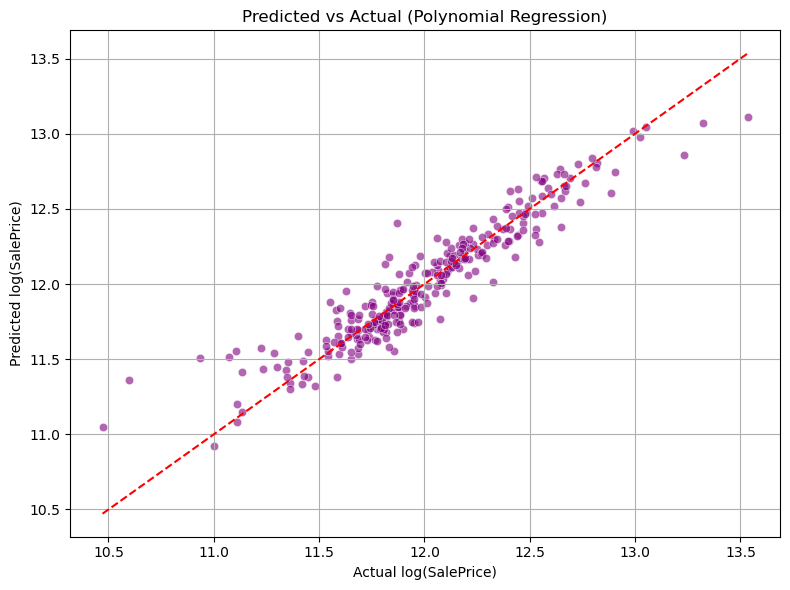

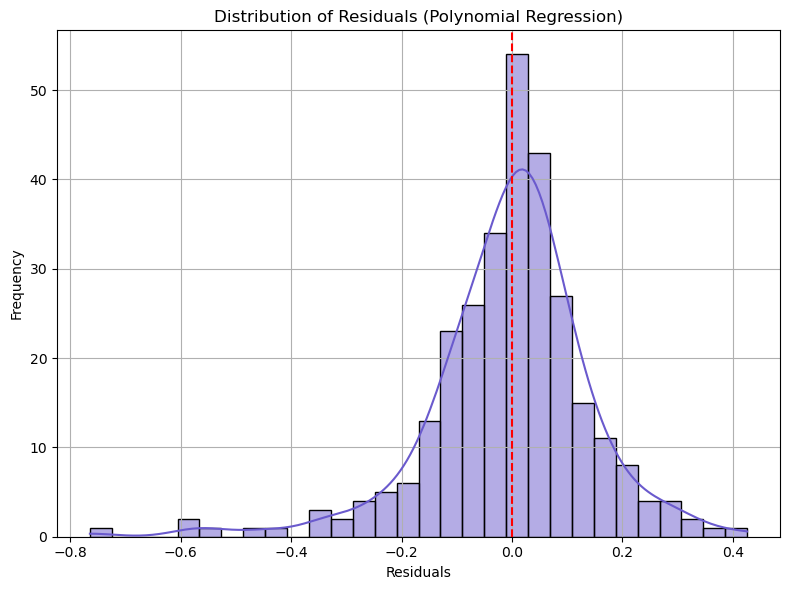

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual log(SalePrice)")
plt.ylabel("Predicted log(SalePrice)")
plt.title("Predicted vs Actual (Polynomial Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='slateblue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Polynomial Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation:** A second-degree polynomial regression model was implemented using the 10 most relevant variables previously selected using Lasso regression. This combination allows for capturing nonlinear relationships and interactions between characteristics without relying on highly complex models.

The model achieved remarkable performance, with an R2 = 0.8860 and an RMSE of 0.1459 in predicting log(SalePrice), which represents a significant improvement over the traditional linear model and the polynomial model with random variable selection. This demonstrates that by incorporating nonlinear and interaction terms, the model is able to capture more complex relationships between variables such as GrLivArea, OverAllQual, GarageCars, and YearBuilt.

Taken together, these results confirm that substantive nonlinear relationships exist between house prices and key variables, and that advanced modeling techniques such as polynomial regression can capture these dynamics more effectively than simple linear models. Furthermore, the use of variable selection (such as Lasso) further boosts performance by focusing on the most informative features. These findings support the use of nonlinear and regularization techniques as recommended strategies for improving predictive accuracy in house price modeling.

# Research Question 5

In [54]:
# Load dataset
df_5 = pd.read_csv("../data/train.csv", parse_dates = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'])

df_5 = df_5.drop('Id', axis = 1) # Drop ID column
df_5['log(SalePrice)'] = np.log1p(df_5["SalePrice"]) # Log transformation of target variable = 'SalePrice'
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MSSubClass      1460 non-null   int64         
 1   MSZoning        1460 non-null   object        
 2   LotFrontage     1201 non-null   float64       
 3   LotArea         1460 non-null   int64         
 4   Street          1460 non-null   object        
 5   Alley           91 non-null     object        
 6   LotShape        1460 non-null   object        
 7   LandContour     1460 non-null   object        
 8   Utilities       1460 non-null   object        
 9   LotConfig       1460 non-null   object        
 10  LandSlope       1460 non-null   object        
 11  Neighborhood    1460 non-null   object        
 12  Condition1      1460 non-null   object        
 13  Condition2      1460 non-null   object        
 14  BldgType        1460 non-null   object        
 15  Hous

In [55]:
## delete columns with more than 90% missing values
threshold = 0.9  
missing_percent = df_5.isnull().mean()
df_5 = df_5.loc[:, missing_percent < threshold]
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MSSubClass      1460 non-null   int64         
 1   MSZoning        1460 non-null   object        
 2   LotFrontage     1201 non-null   float64       
 3   LotArea         1460 non-null   int64         
 4   Street          1460 non-null   object        
 5   LotShape        1460 non-null   object        
 6   LandContour     1460 non-null   object        
 7   Utilities       1460 non-null   object        
 8   LotConfig       1460 non-null   object        
 9   LandSlope       1460 non-null   object        
 10  Neighborhood    1460 non-null   object        
 11  Condition1      1460 non-null   object        
 12  Condition2      1460 non-null   object        
 13  BldgType        1460 non-null   object        
 14  HouseStyle      1460 non-null   object        
 15  Over

In [56]:
df_plot = df_5.copy()
df_plot['YearBuilt'] = df_plot['YearBuilt'].dt.year
df_plot['YearRemodAdd'] = df_plot['YearRemodAdd'].dt.year

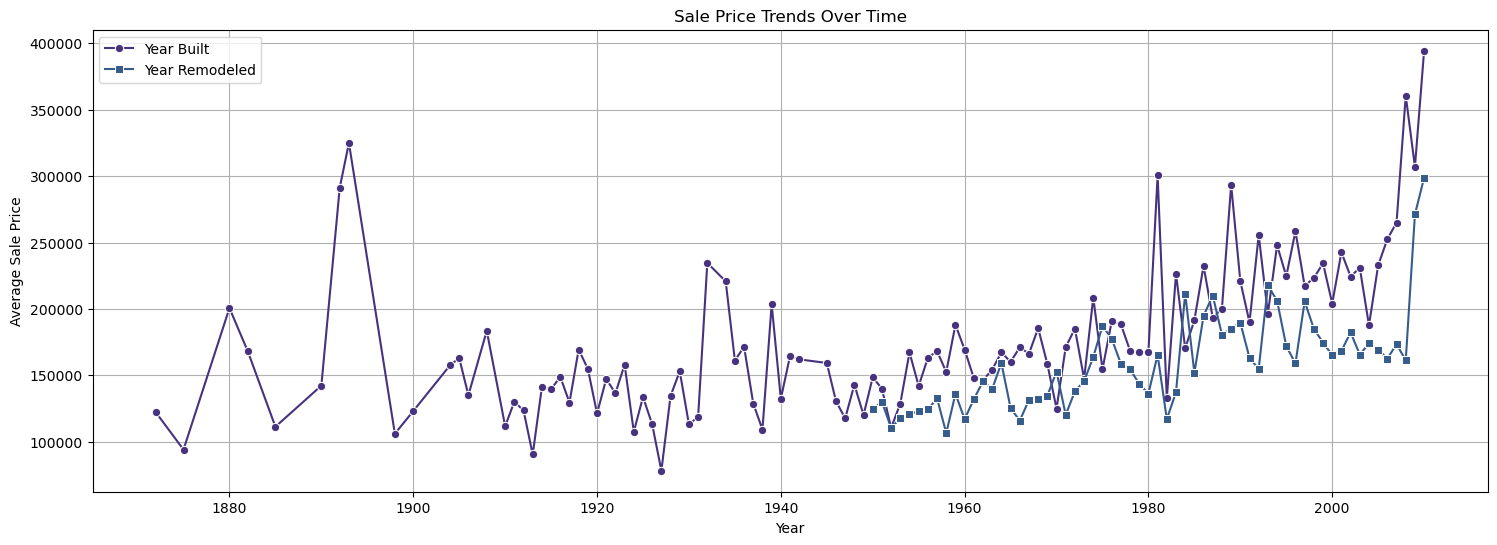

In [57]:
# Compute the average SalePrice per year for each temporal variable
df_avg = df_plot.groupby(['YearBuilt', 'YearRemodAdd'])['SalePrice'].mean().reset_index()

plt.figure(figsize=(18, 6))

# Plot lines for each temporal feature without confidence interval (shading)
sns.lineplot(x='YearBuilt', y='SalePrice', data=df_avg, label='Year Built', marker='o', ci=None)
sns.lineplot(x='YearRemodAdd', y='SalePrice', data=df_avg, label='Year Remodeled', marker='s', ci=None)
#sns.lineplot(x='GarageYrBlt', y='SalePrice', data=df_avg, label='Garage Year Built', marker='D', ci=None)
#sns.lineplot(x='YrSold', y='SalePrice', data=df_avg, label='Year Sold', marker='^', ci=None)

# Labels and legend
plt.title('Sale Price Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

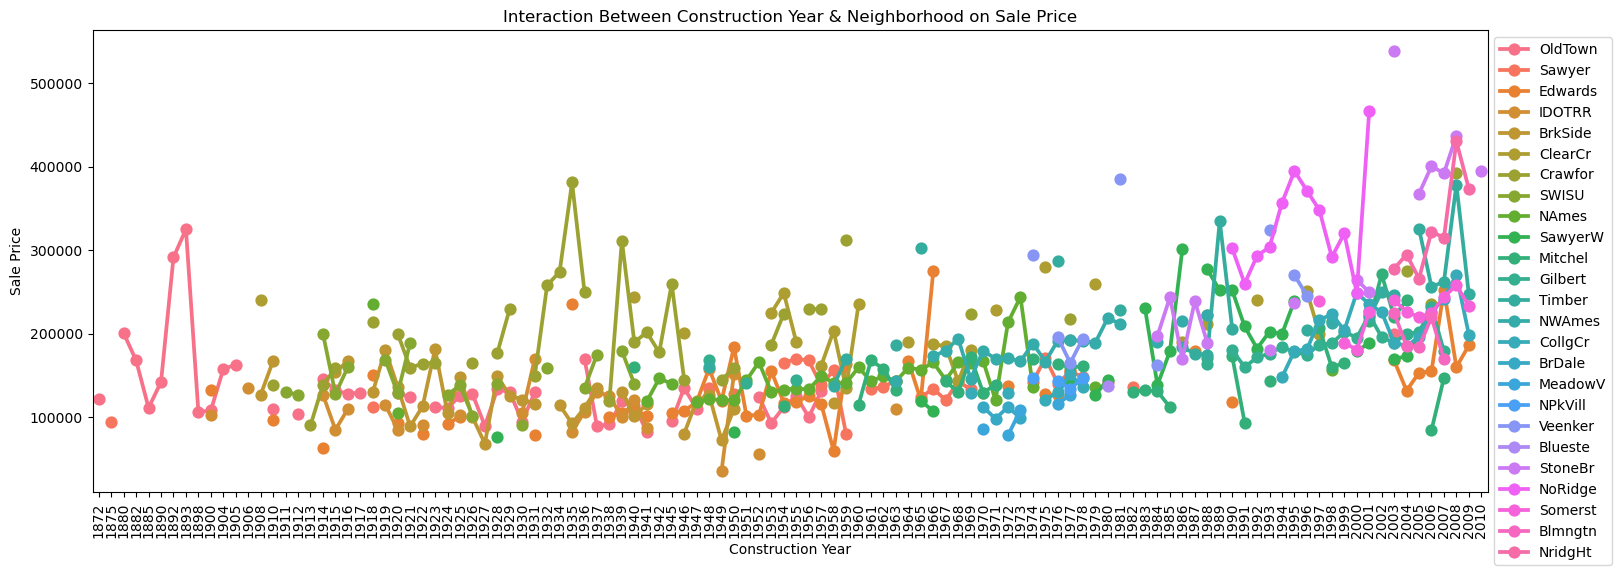

In [58]:
# Compute the average SalePrice per year for each temporal variable
df_avg = df_plot.groupby(['YearBuilt', 'Neighborhood'])['SalePrice'].mean().reset_index()
plt.figure(figsize=(18, 6))
sns.pointplot(x='YearBuilt', y='SalePrice', hue='Neighborhood', data=df_avg, ci=None)
#year_ticks = np.arange(df_avg['YearBuilt'].min(), df_avg['YearBuilt'].max() + 1, 10)
#plt.xticks(year_ticks, rotation=90)  # Rotate labels for better readability

plt.xticks(rotation=90)
plt.title('Interaction Between Construction Year & Neighborhood on Sale Price')
plt.xlabel('Construction Year')
plt.ylabel('Sale Price')
# Adjust legend position
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [59]:
# MIXED Effects model - pending

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

df_mixed = df_plot.copy()
df_mixed = df_mixed.dropna(subset=['YearBuilt', 'Neighborhood', 'log(SalePrice)'])

# model
model = mixedlm("Q('log(SalePrice)') ~ YearBuilt", 
                data=df_mixed, 
                groups=df_mixed["Neighborhood"])

result = model.fit()


print(result.summary())


              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('log(SalePrice)')
No. Observations: 1460    Method:             REML               
No. Groups:       25      Scale:              0.0657             
Min. group size:  2       Log-Likelihood:     -140.3464          
Max. group size:  225     Converged:          Yes                
Mean group size:  58.4                                           
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|    [0.025    0.975]
--------------------------------------------------------------------
Intercept    2.920       0.924    3.160    0.002     1.109     4.731
YearBuilt    0.005       0.000    9.880    0.000     0.004     0.006
Group Var    0.076       0.091                                      



**Interpretation:** A mixed-effects regression model was fitted, modeling log(SalePrice) as a function of year built (YearBuilt) as a fixed effect, and including Neighborhood as a random effect. This model captures both the overall trend in the time effect and differences in base price across neighborhoods.

The results indicate that the coefficient on YearBuilt is positive and highly significant (coef = 0.005, p < 0.001), implying that for each additional year since construction, the logarithmic value of the sale price increases by an average of 0.5%. This suggests that newer homes tend to sell for higher prices, which is consistent with the expectation that more recent constructions are in better condition or incorporate modern materials and standards.

Additionally, the model estimates a between-neighborhood variance of 0.076, indicating that there are substantial differences in base prices across neighborhoods, even after controlling for the year of construction. That is, the positive effect of building more recently remains, but the base price varies by area, justifying the use of a mixed-effects model instead of a simple linear regression.

Taken together, these results support the hypothesis in RQ5: temporal factors significantly influence housing prices, and this relationship is modulated by differences across neighborhoods. This finding is key to understanding how a property's value varies not only based on its age, but also on the spatial context in which it is located.

In [60]:
# fixed effects: year built and year remodeled

import statsmodels.api as sm
from statsmodels.formula.api import ols

df_fixed = df_mixed.copy()
df_fixed = df_fixed.dropna(subset=['YearBuilt', 'YearRemodAdd', 'log(SalePrice)'])

# model
fixed_model = ols("Q('log(SalePrice)') ~ YearBuilt + YearRemodAdd", data=df_fixed).fit()

print(fixed_model.summary())


                             OLS Regression Results                            
Dep. Variable:     Q('log(SalePrice)')   R-squared:                       0.417
Model:                             OLS   Adj. R-squared:                  0.416
Method:                  Least Squares   F-statistic:                     521.6
Date:                 Fri, 21 Mar 2025   Prob (F-statistic):          1.43e-171
Time:                         02:01:40   Log-Likelihood:                -337.16
No. Observations:                 1460   AIC:                             680.3
Df Residuals:                     1457   BIC:                             696.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.9770      0.772    

**Interpretation:** A linear regression model with fixed effects was estimated, where the dependent variable was log(SalePrice) and the independent variables were YearBuilt and YearRemodAdd. This model seeks to isolate the effect of home age and renovations on sales price, ignoring geographic variations (such as neighborhood).

Both predictors were found to be positive and highly significant:
- The coefficient on YearBuilt is 0.0051 (p < 0.001), indicating that for each more recent year of construction, the logarithmic price of the home increases by 0.51% on average.
- The coefficient on YearRemodAdd is 0.0065 (p < 0.001), suggesting that more recent renovations have an even larger effect: each additional year is associated with a 0.65% increase in log(SalePrice).

The model achieves an R2 = 0.417, implying that approximately 41.7% of the variability in home prices can be explained solely by these two temporal factors. Although this value is not extremely high, it does demonstrate that temporal factors have a substantial and systematic influence on home values.

These results clearly support the hypothesis posed in RQ5: temporal factors such as year of construction and year of remodeling have positive and statistically significant effects on home prices. Furthermore, the fact that year of remodeling has an even higher coefficient than year of construction suggests that improvements made over time may have a more direct impact on perceived property value than its original age.